# Compound Events
- https://github.com/e-baumer/standard_precip

In [1]:
%%time
import os
import pandas as pd
import warnings
from plot import Plot
from process import Compound
warnings.filterwarnings('ignore')

event = ['CWHE','CDHE'][1]
months = [6, 7, 8]
center='LARC'

freq, scale = 'D', 3

plotly = False

metrics = {
    '_duration_mean$':  f'Average {event} Event Duration',
    '_sequence_total$': f'Total {event} Event Sequences',
    '_event_max$':      f'Max Consecutive {event} Events',
    '_event_total$':    f'Total {event} Events',
    '_day_total$':      f'Total {event} Days'
}

def setup_thresholds(event):
    '''Set up thresholds for different severity levels of compound events.'''
    def f_to_c(f):
        return (f - 32) * 5/9
            
    if event == 'CDHE':
        spi_op, tm_op = '<', '>' # spi (standardized), tm (f->c)
        return[{'spi': (spi_op, -1), 'tasmax': (tm_op, f_to_c(90))},
               {'spi': (spi_op, -2), 'tasmax': (tm_op, f_to_c(90))}]
    elif event == 'CWHE':
        spi_op, tm_op = '>', '>'
        return[{'spi': (spi_op, -1), 'tasmax': (tm_op, f_to_c(90))},
               {'spi': (spi_op, -2), 'tasmax': (tm_op, f_to_c(90))}]
    else:
        raise ValueError('Invalid event type')
        
thresholds = setup_thresholds(event)

results, compound, pr_spi, tm, pr_, tm_, spi_ = Compound(center, event, months, freq, scale, thresholds).main()

Processing ssp126 spi (1980-01-01 to 2100-12-31)...
--> filtered: 1981-01-01 to 2100-12-31
--> base: 1981 to 2020
Processing ssp245 spi (1980-01-01 to 2100-12-31)...
--> filtered: 1981-01-01 to 2100-12-31
--> base: 1981 to 2020
Processing ssp370 spi (1980-01-01 to 2100-12-31)...
--> filtered: 1981-01-01 to 2100-12-31
--> base: 1981 to 2020
CPU times: user 10.5 s, sys: 319 ms, total: 10.8 s
Wall time: 11 s


# Analysis
## Trends

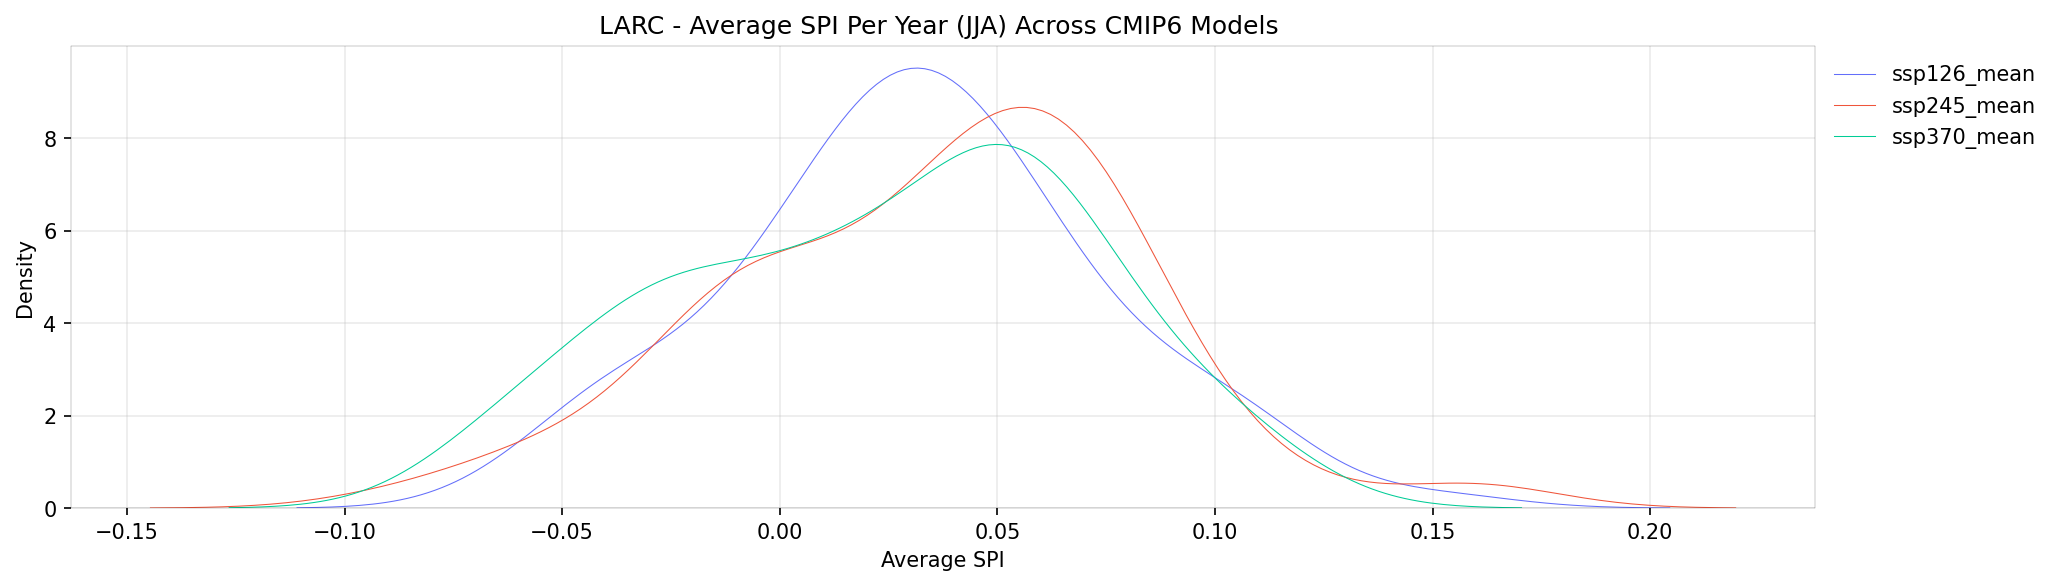

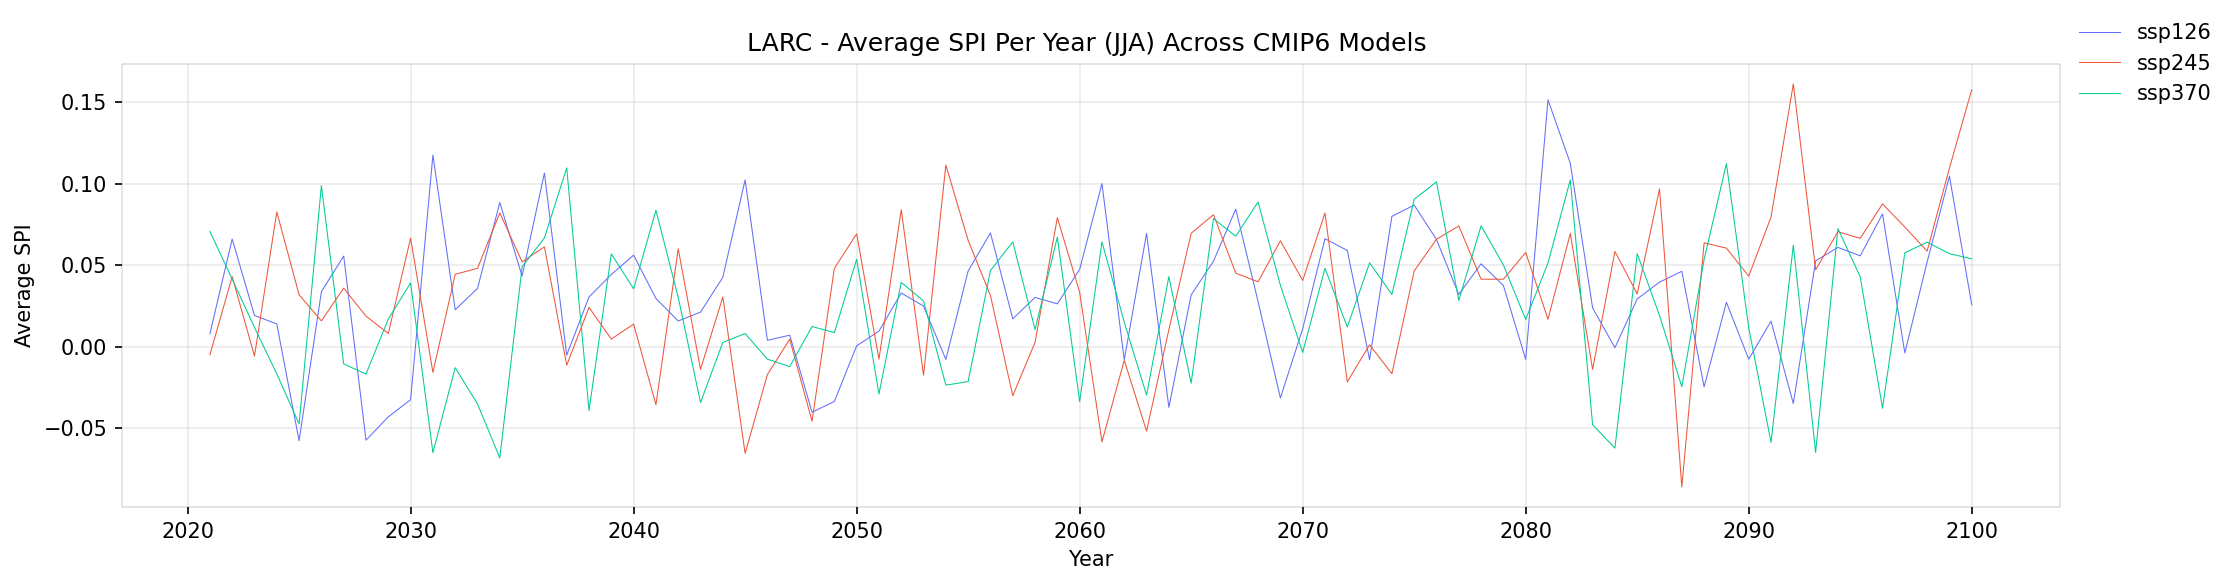

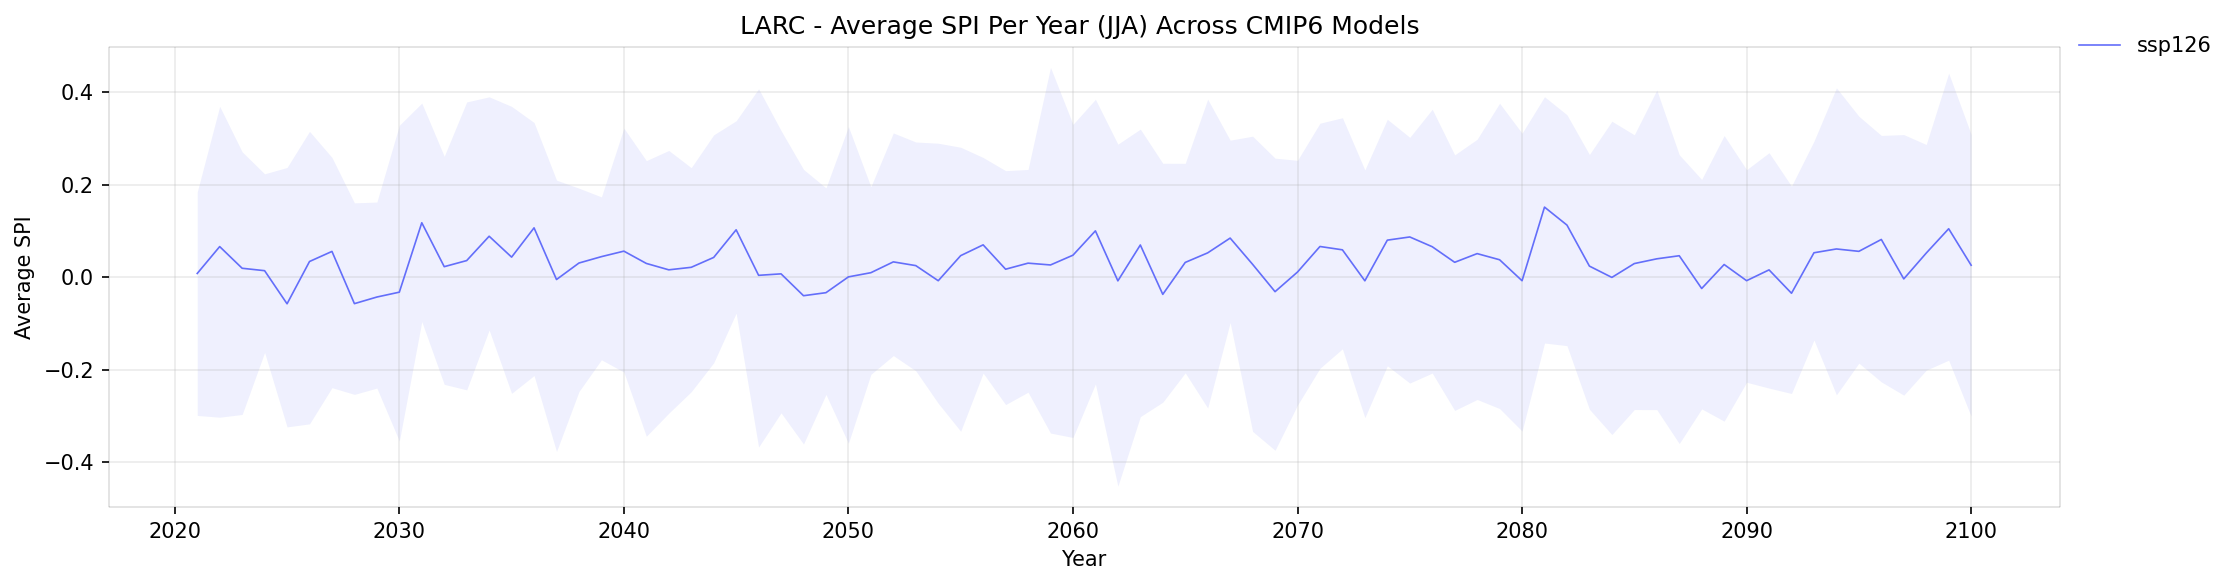

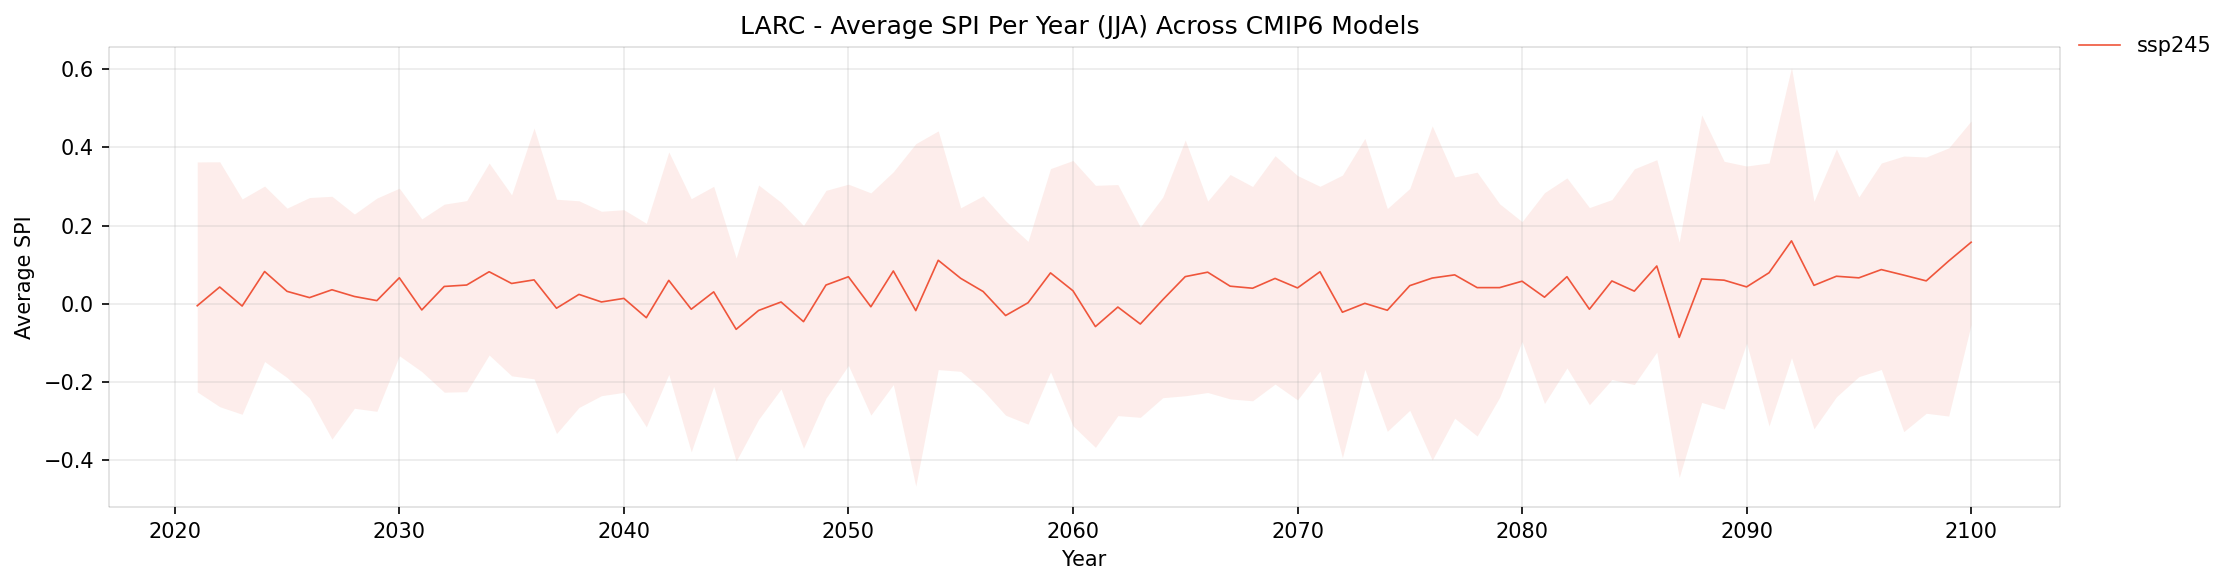

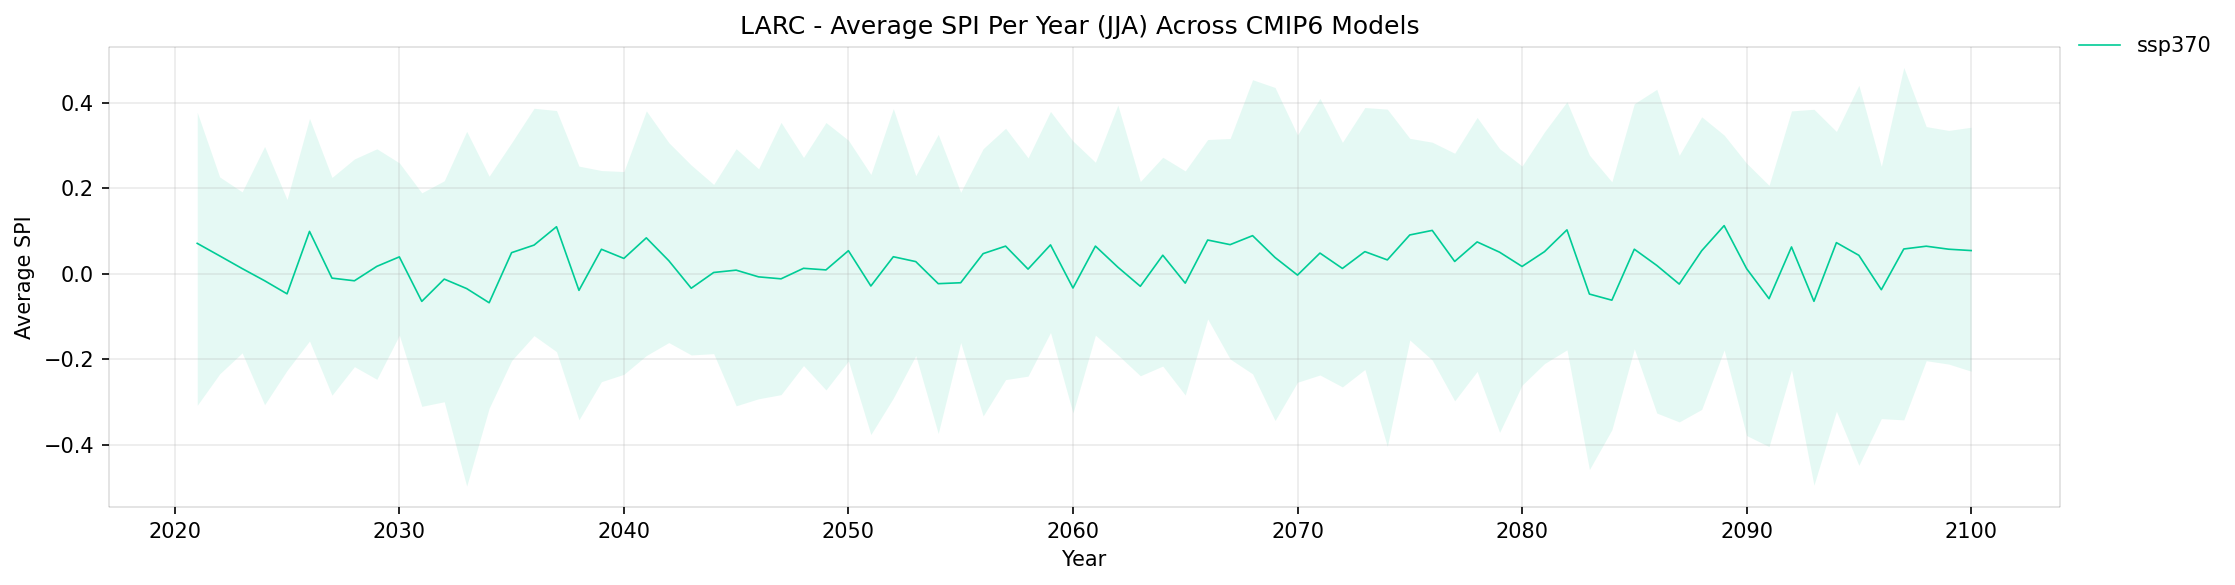

In [2]:
# SPI
p = Plot(center, months, f'Average SPI', '_spi$')
p.dist_sns(spi_)
p.ts_plotly(spi_) if plotly else p.ts_sns(spi_)

In [3]:
# # Max Temperature
# p = Plot(center, months, f'Average Max Temperature', '_tasmax$')
# p.dist_sns(tm_)
# p.ts_plotly(tm_) if plotly else p.ts_sns(tm_)

In [4]:
# # Precipitation
# p = Plot(center, months, f'Average Precipitation', '_pr$')
# p.dist_sns(pr_)
# p.ts_plotly(pr_) if plotly else p.ts_sns(pr_)

## Compound

In [5]:
display(results['spi<-1_tasmax>32.2'].filter(regex='ACCESS-CM2'))

ACCESS-CM2_compound_duration_mean  \
ssp    date                                      
ssp126 2021                               2.67   
       2022                               3.17   
       2023                               2.00   
       2024                               2.00   
       2025                               3.00   
...                                        ...   
ssp370 2096                               4.50   
       2097                               3.50   
       2098                               4.40   
       2099                               2.40   
       2100                               2.00   

             ACCESS-CM2_compound_sequence_total  \
ssp    date                                       
ssp126 2021                                   3   
       2022                                   6   
       2023                                   3   
       2024                                   2   
       2025                                   1   
...                                         ...   
ssp370 2096                                   2   
       2097                                   4   
       2098                                   5   
       2099                                   5   
       2100                                   1   

             ACCESS-CM2_compound_event_max  ACCESS-CM2_compound_event_total  \
ssp    date                                                                   
ssp126 2021                              4                                8   
       2022                              7                               19   
       2023                              2                                6   
       2024                              2                                4   
       2025                              3                                3   
...                                    ...                              ...   
ssp370 2096                              6                                9   
       2097                              6                               14   
       2098                             10                               22   
       2099                              3                               12   
       2100                              2                                2   

             ACCESS-CM2_compound_day_total  
ssp    date                                 
ssp126 2021                             11  
       2022                             19  
       2023                              7  
       2024                              7  
       2025                              5  
...                                    ...  
ssp370 2096                             11  
       2097                             15  
       2098                             22  
       2099                             15  
       2100                              5  

[240 rows x 5 columns]

In [6]:
# # Total Compound Days
# m = '_day_total$'
# Plot(center, months, metrics[m], m).all(results, plotly)

In [7]:
# # Total Compound Days
# m = '_event_total$'
# Plot(center, months, metrics[m], m).all(results, plotly)

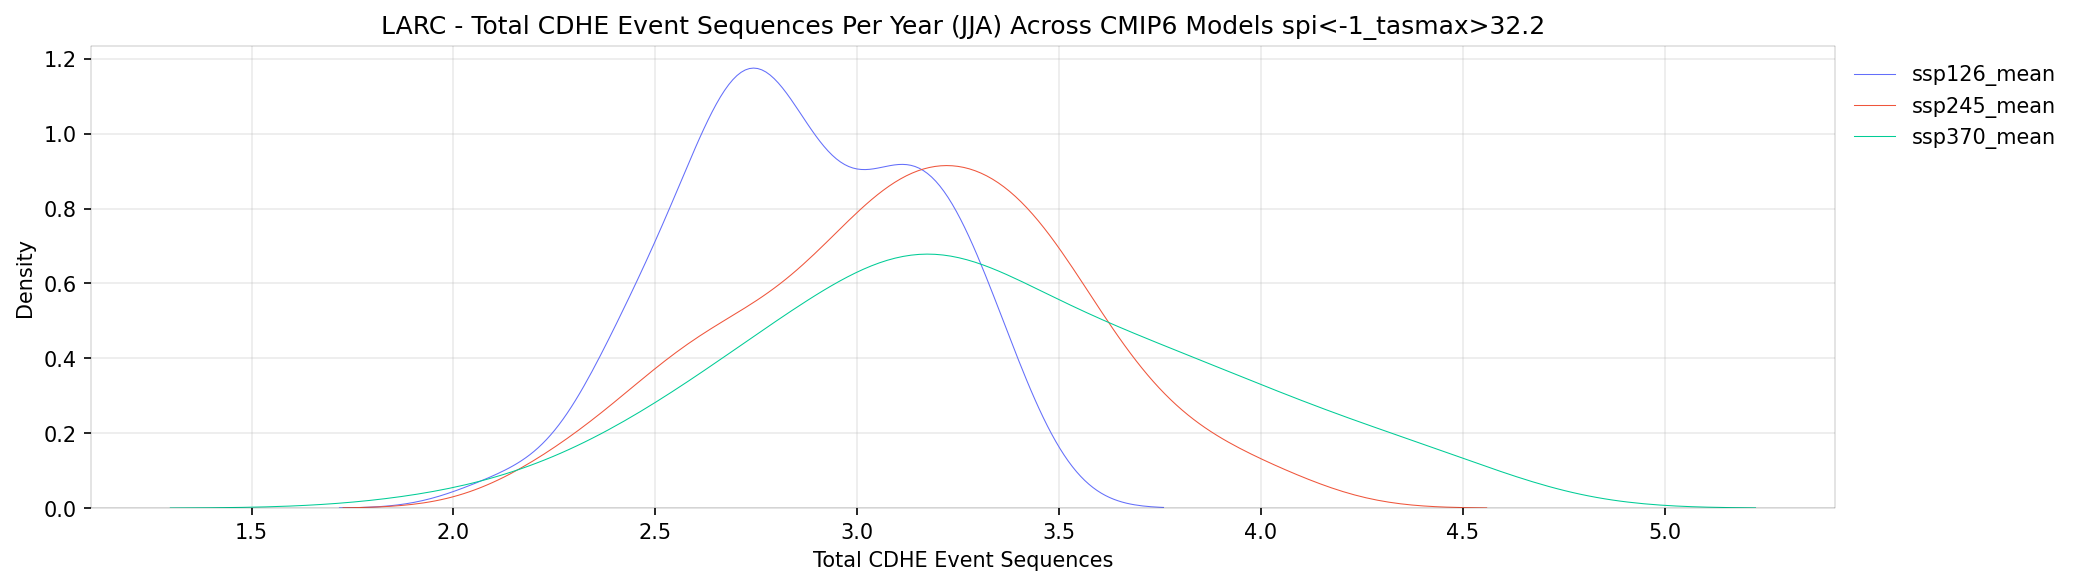

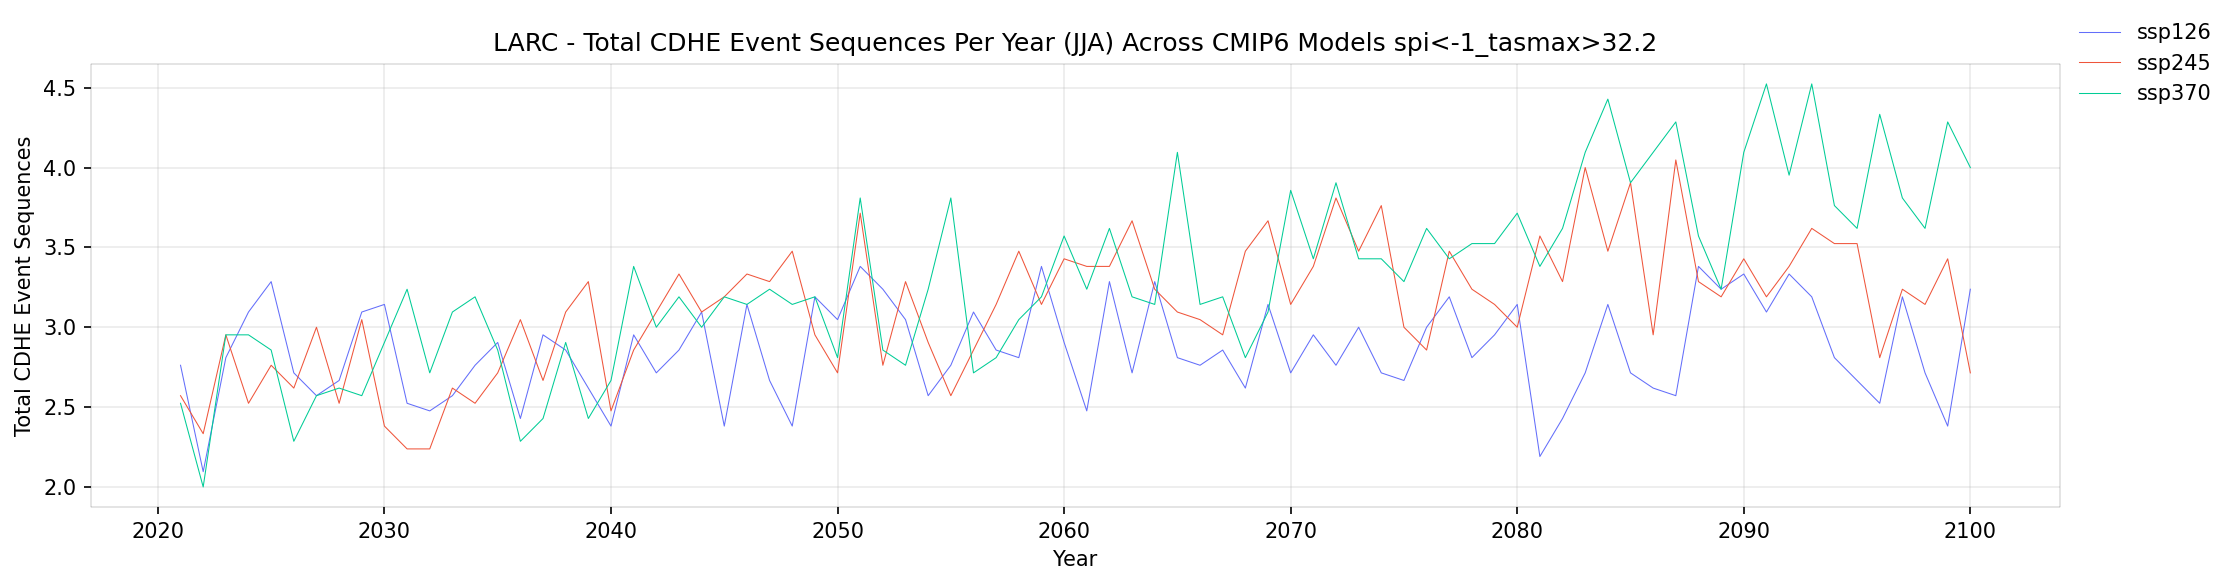

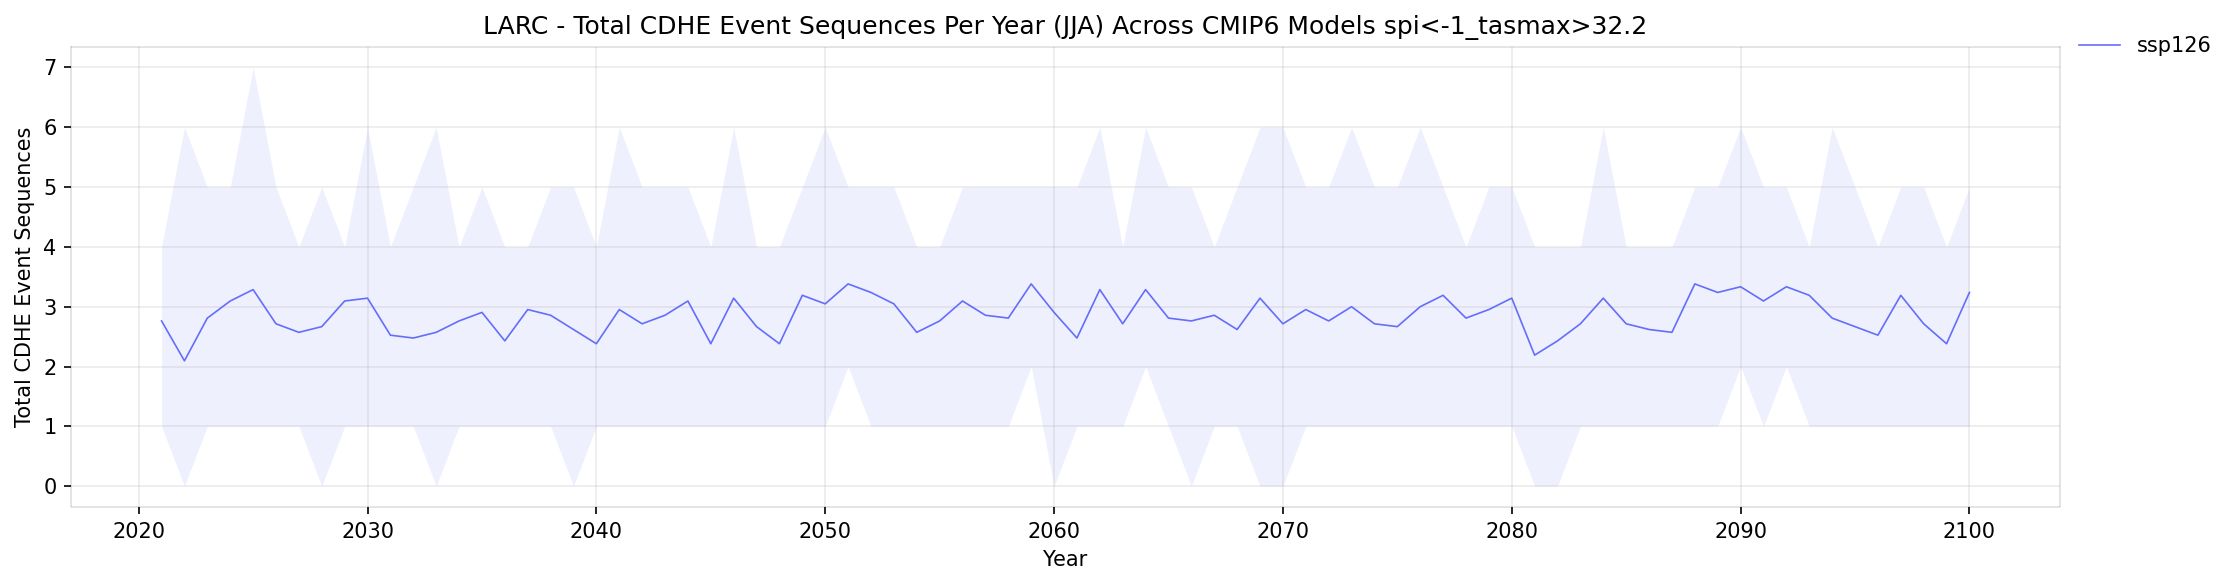

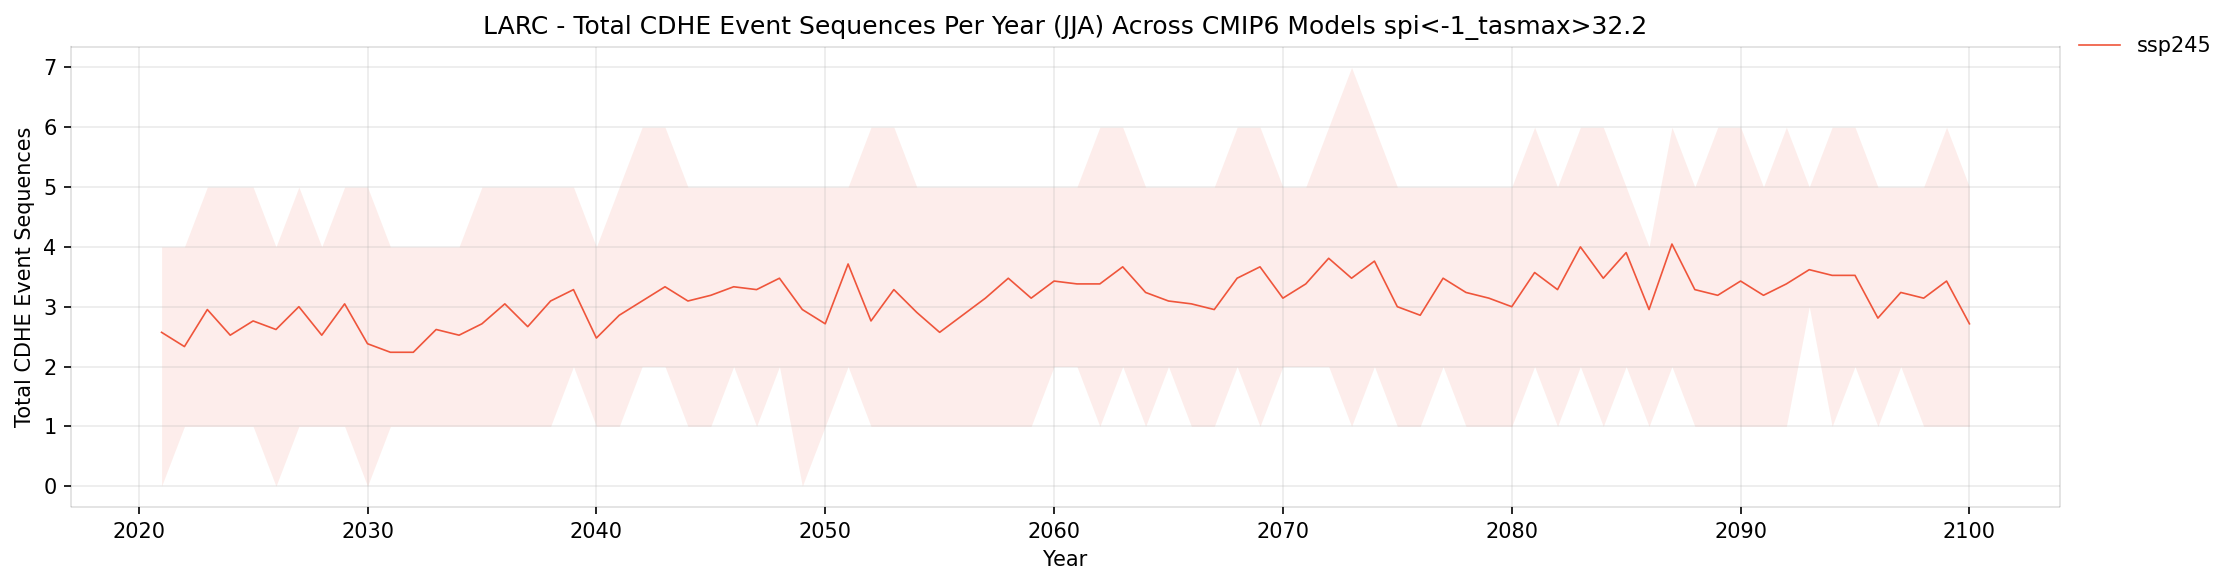

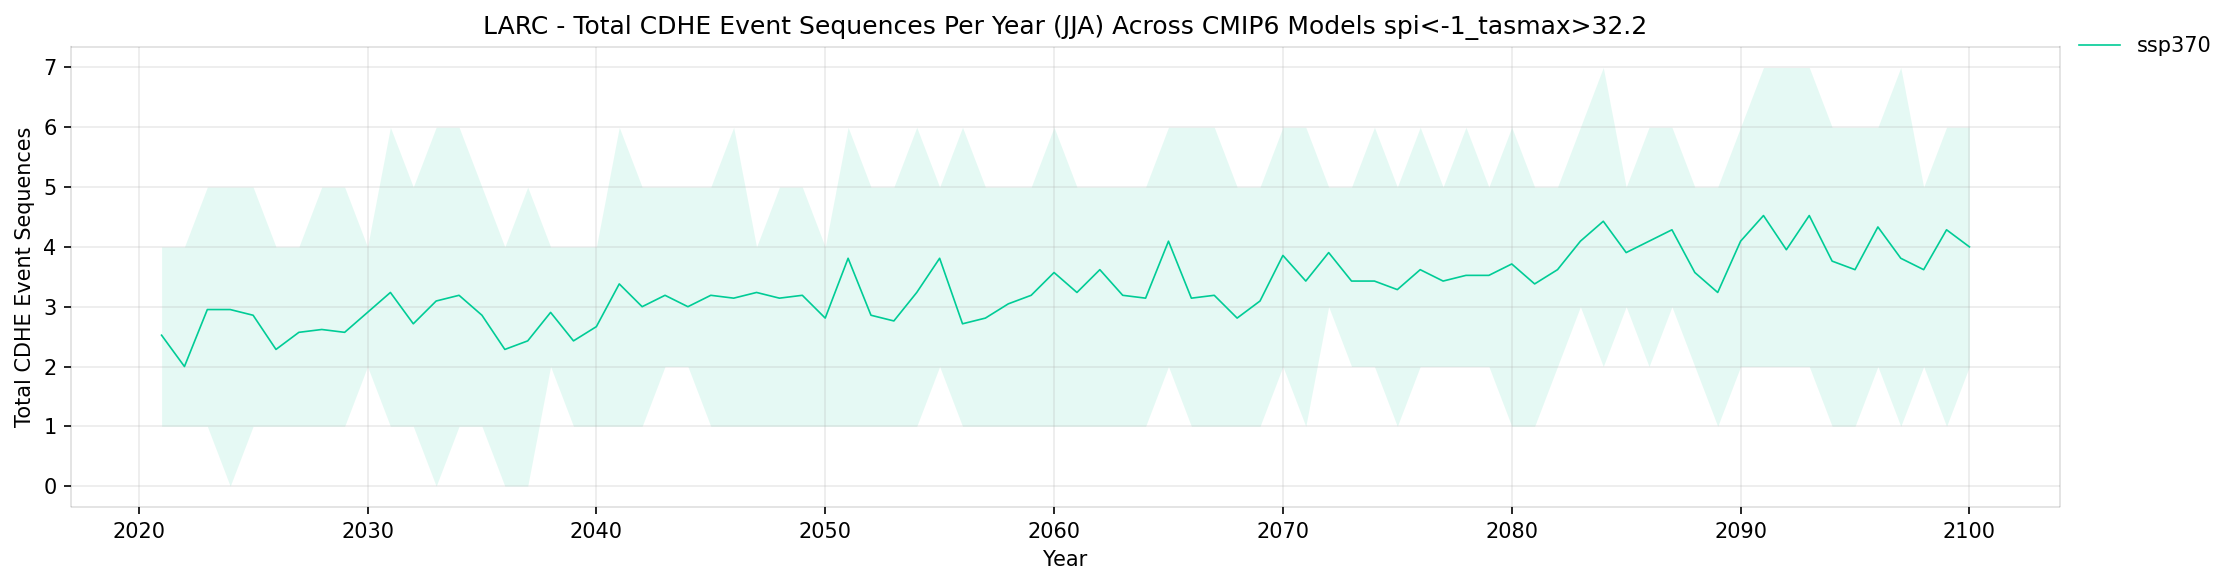

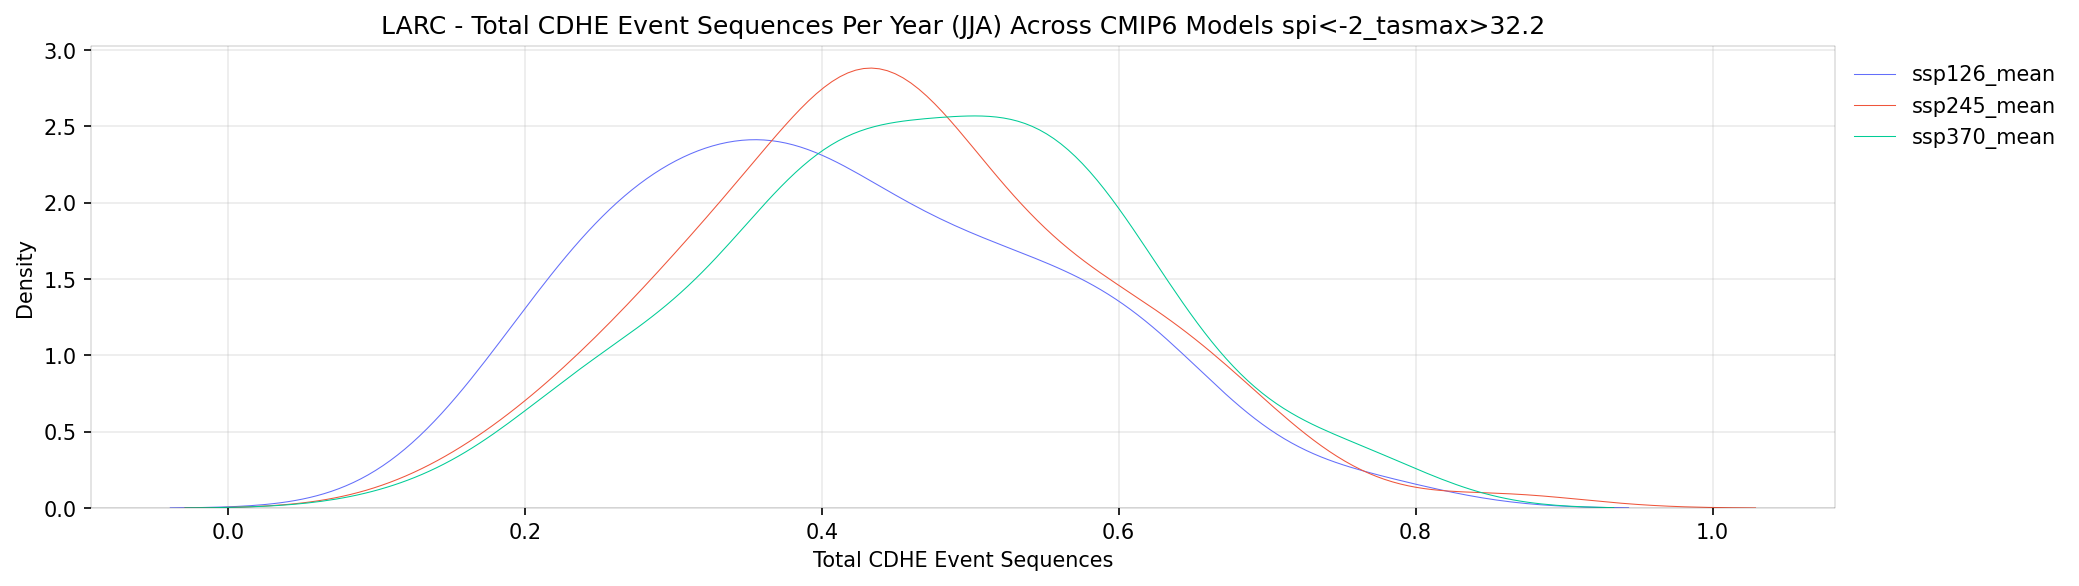

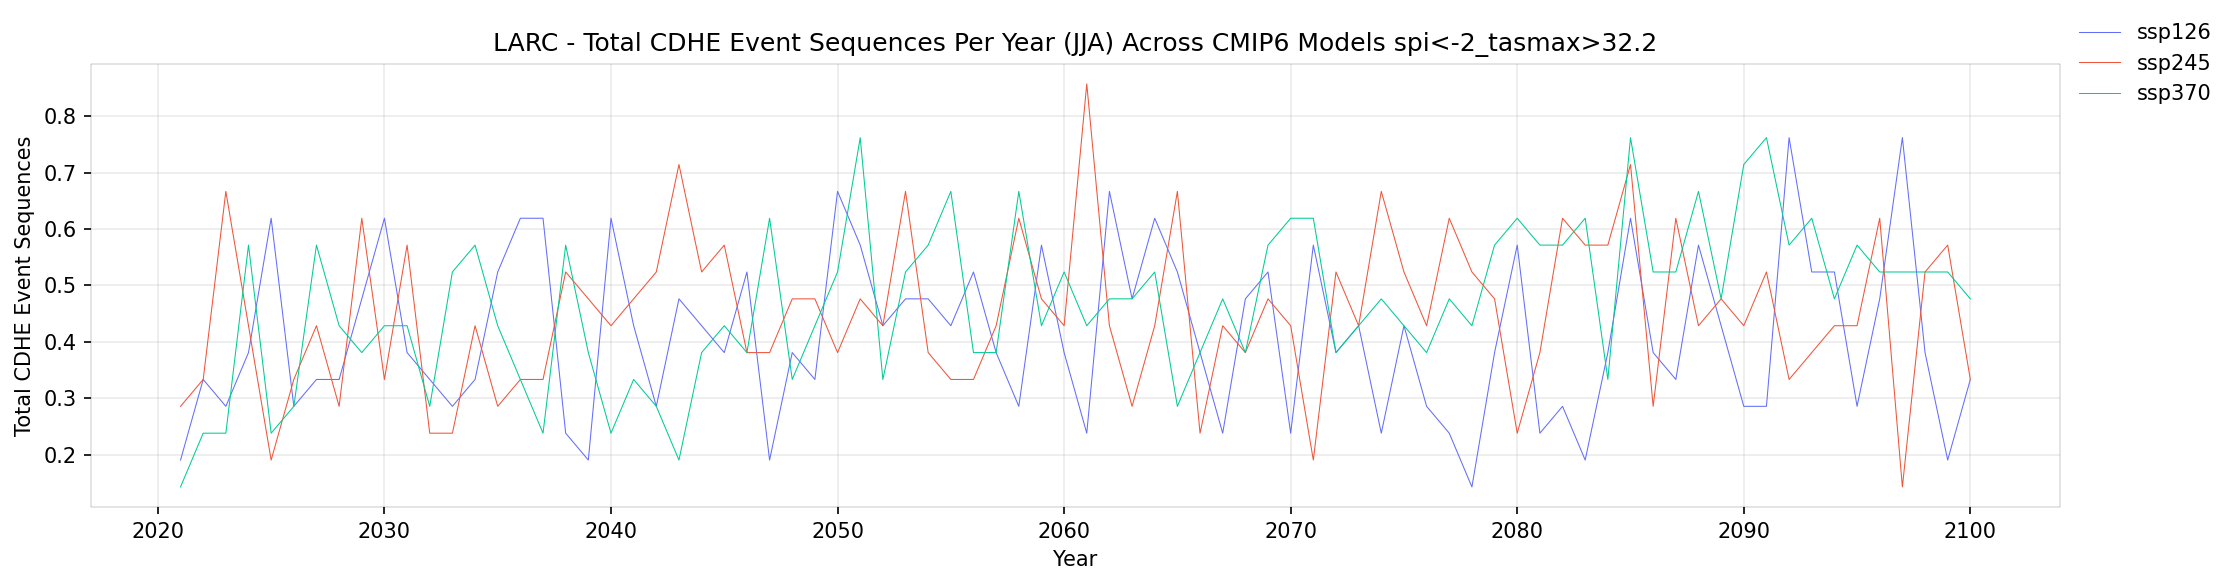

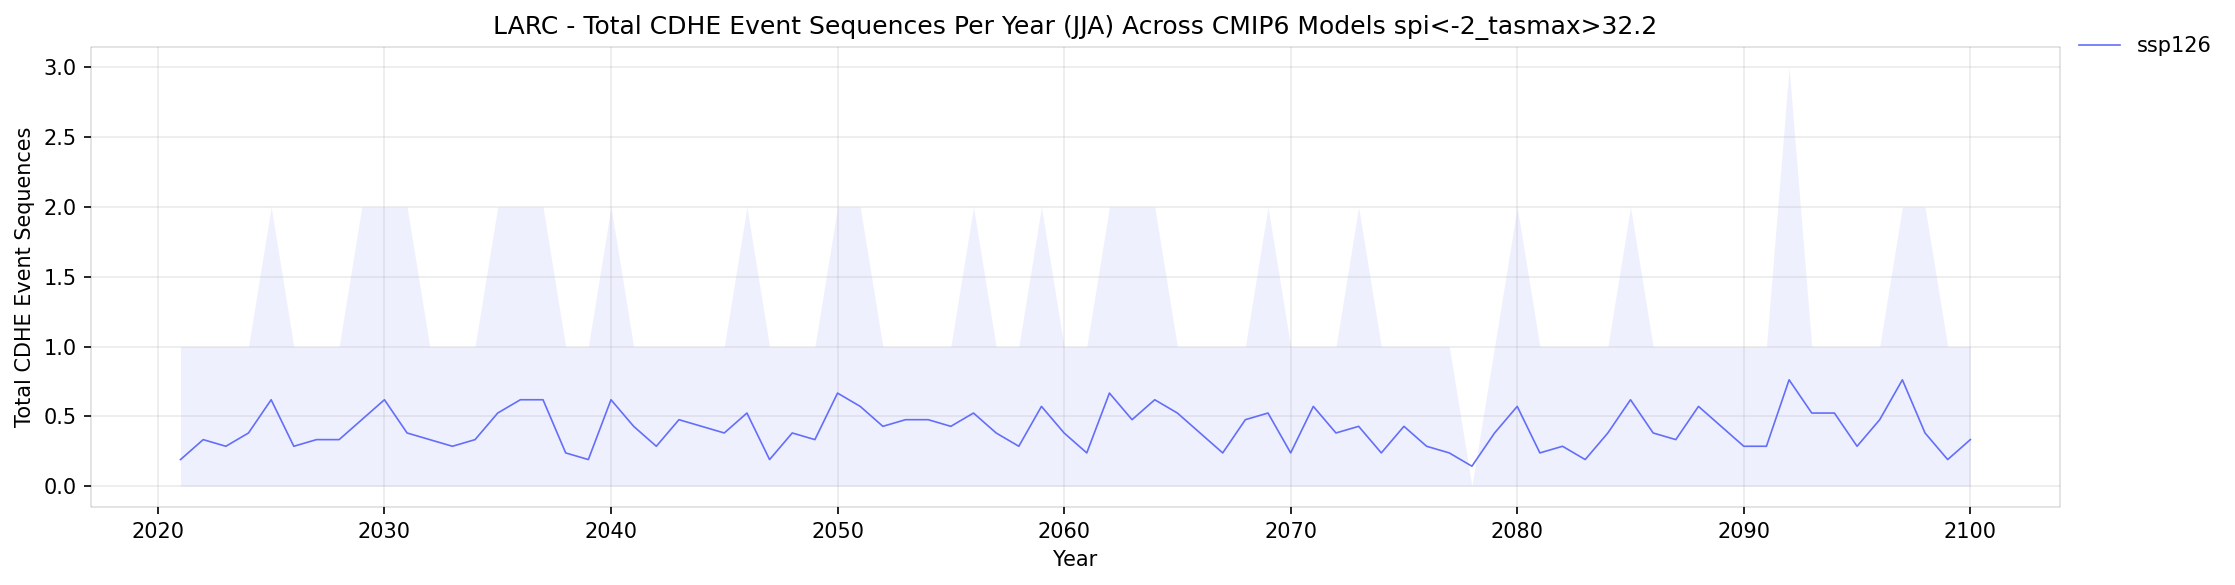

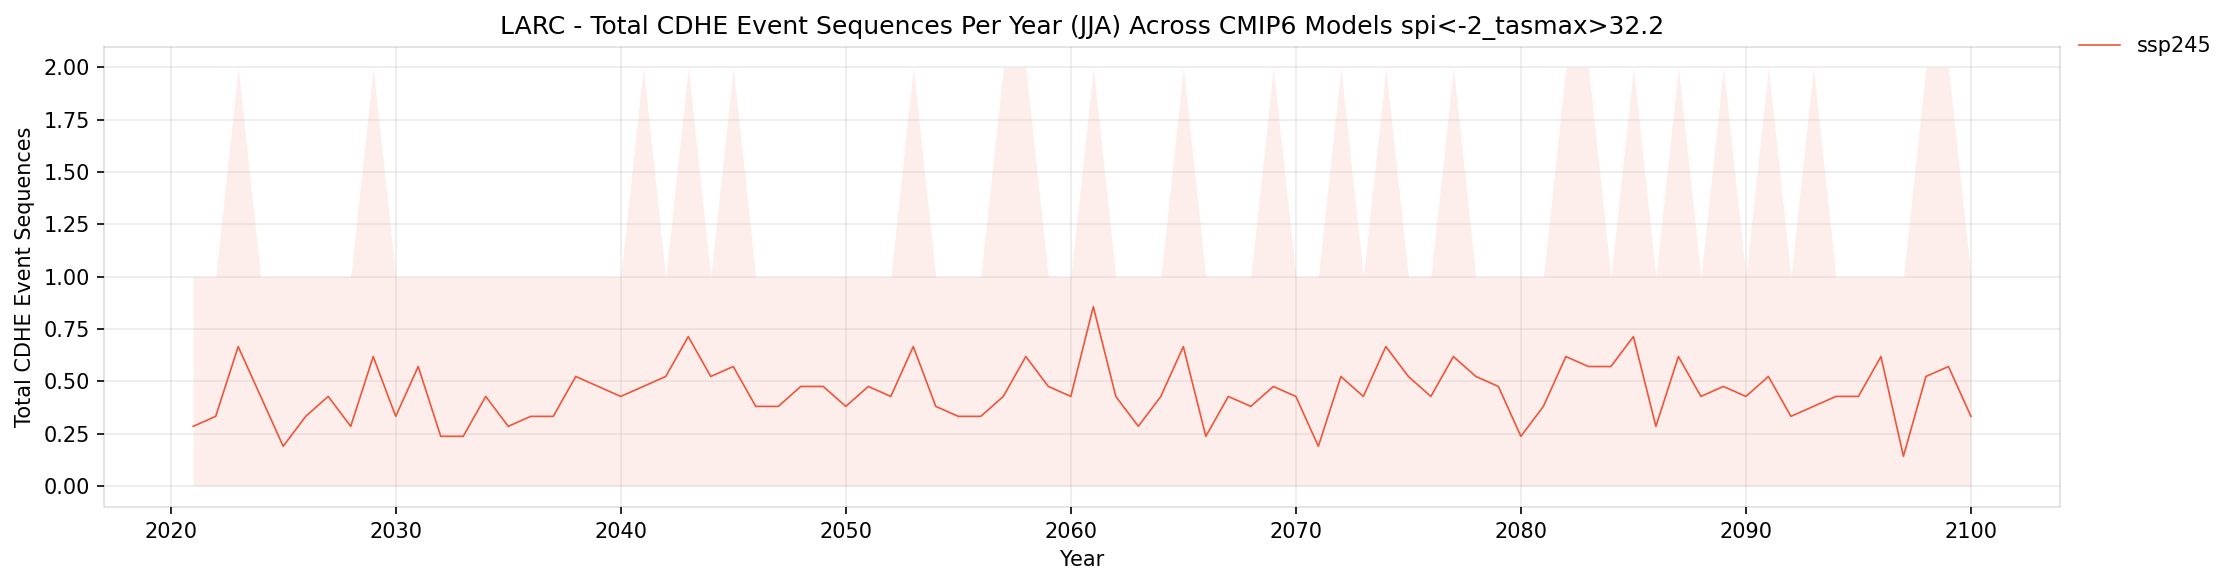

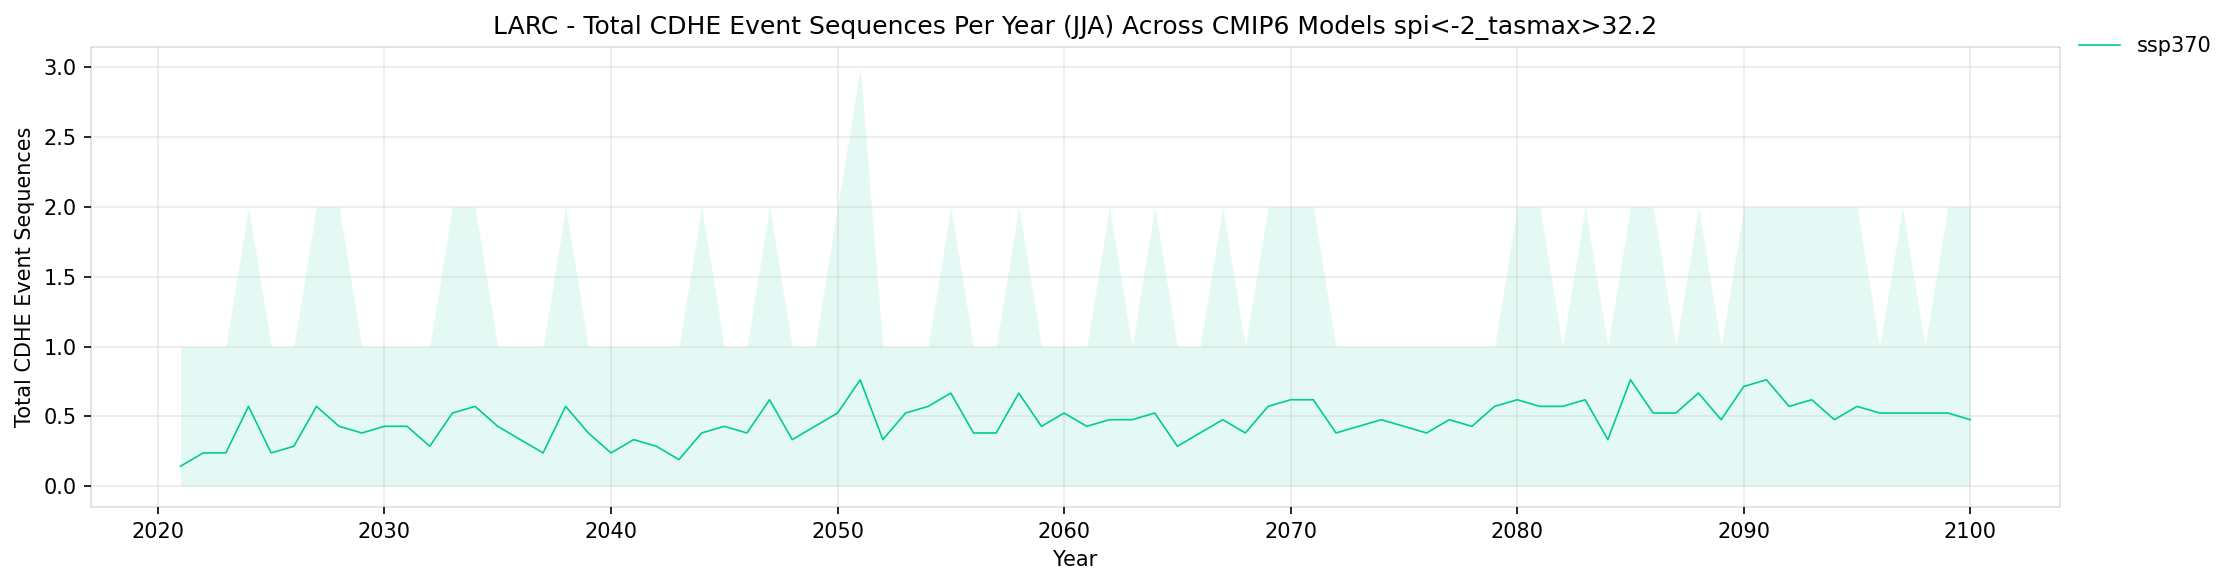

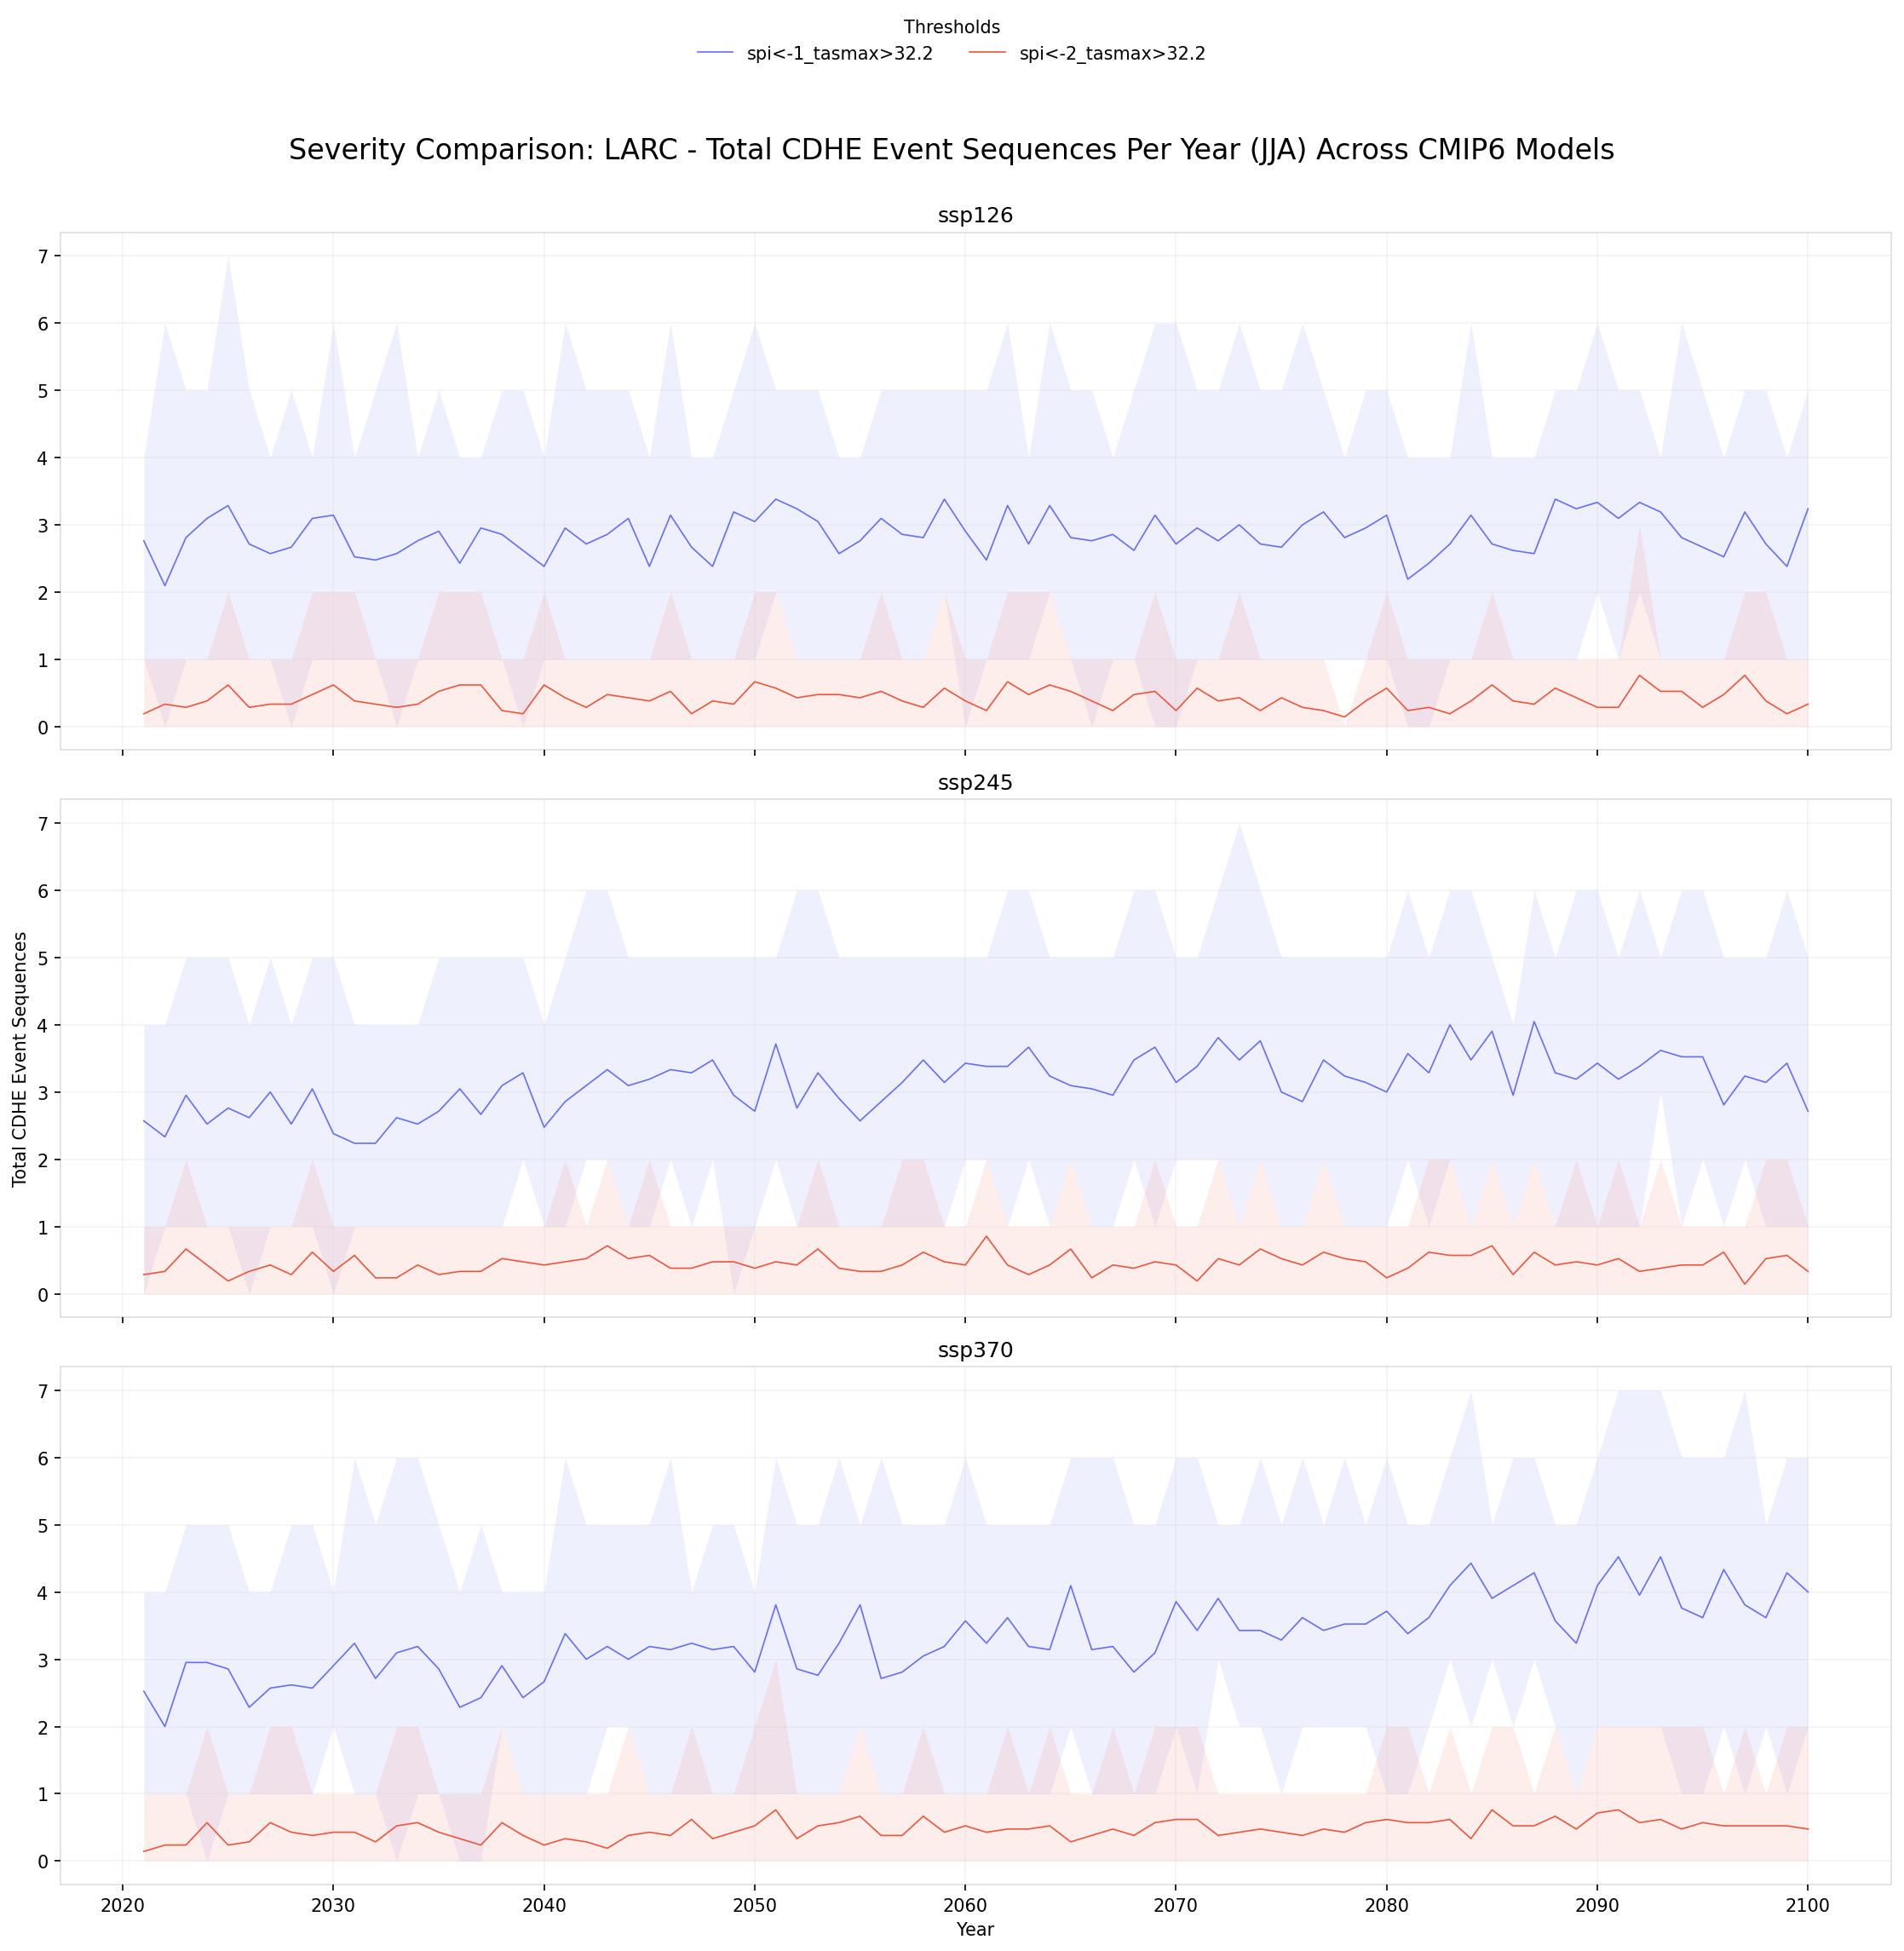

In [8]:
# Total Compound Event Sequences
m = '_sequence_total$'
Plot(center, months, metrics[m], m).all(results, plotly)

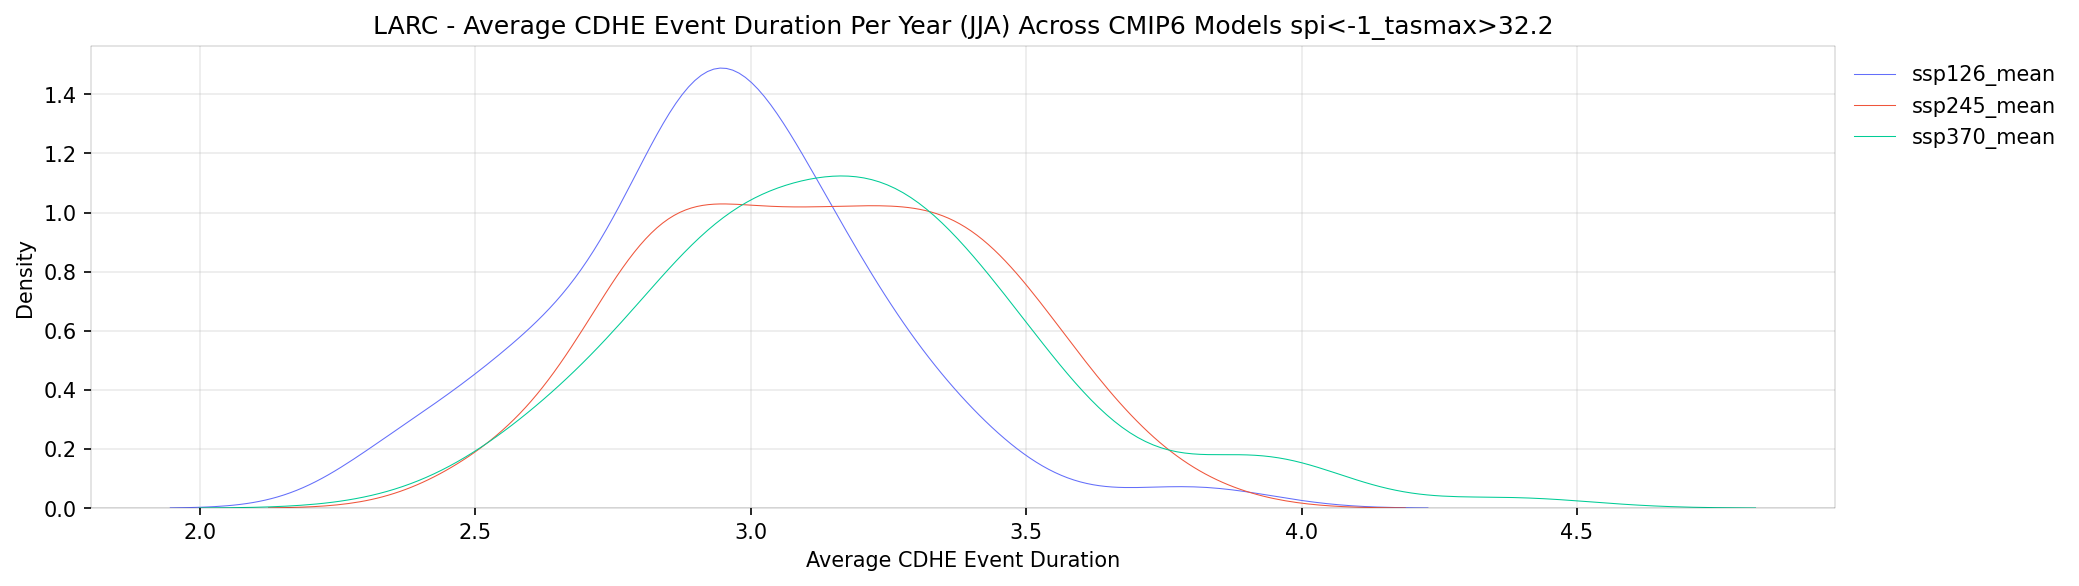

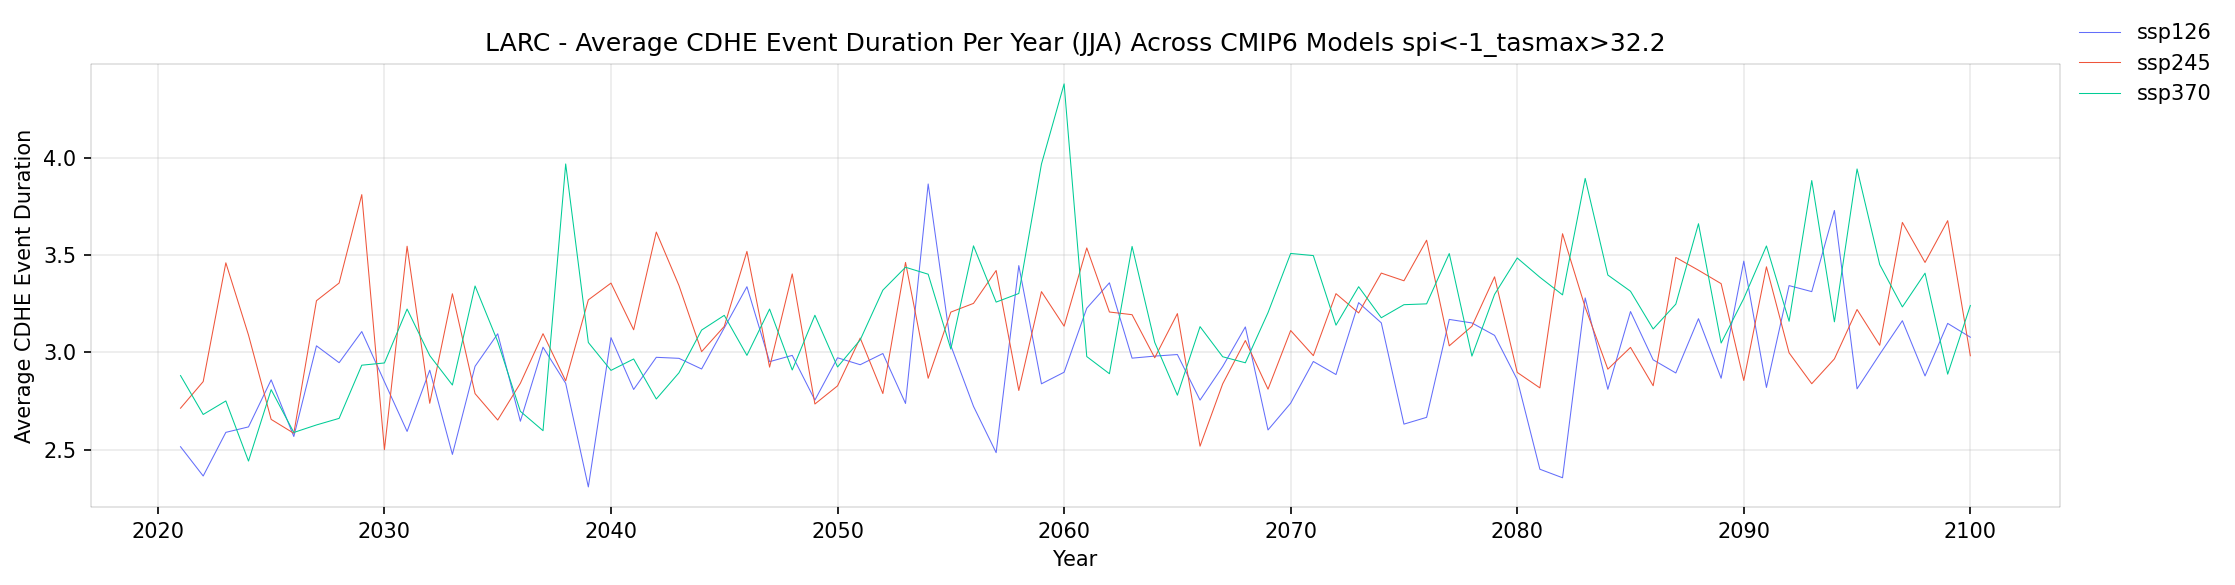

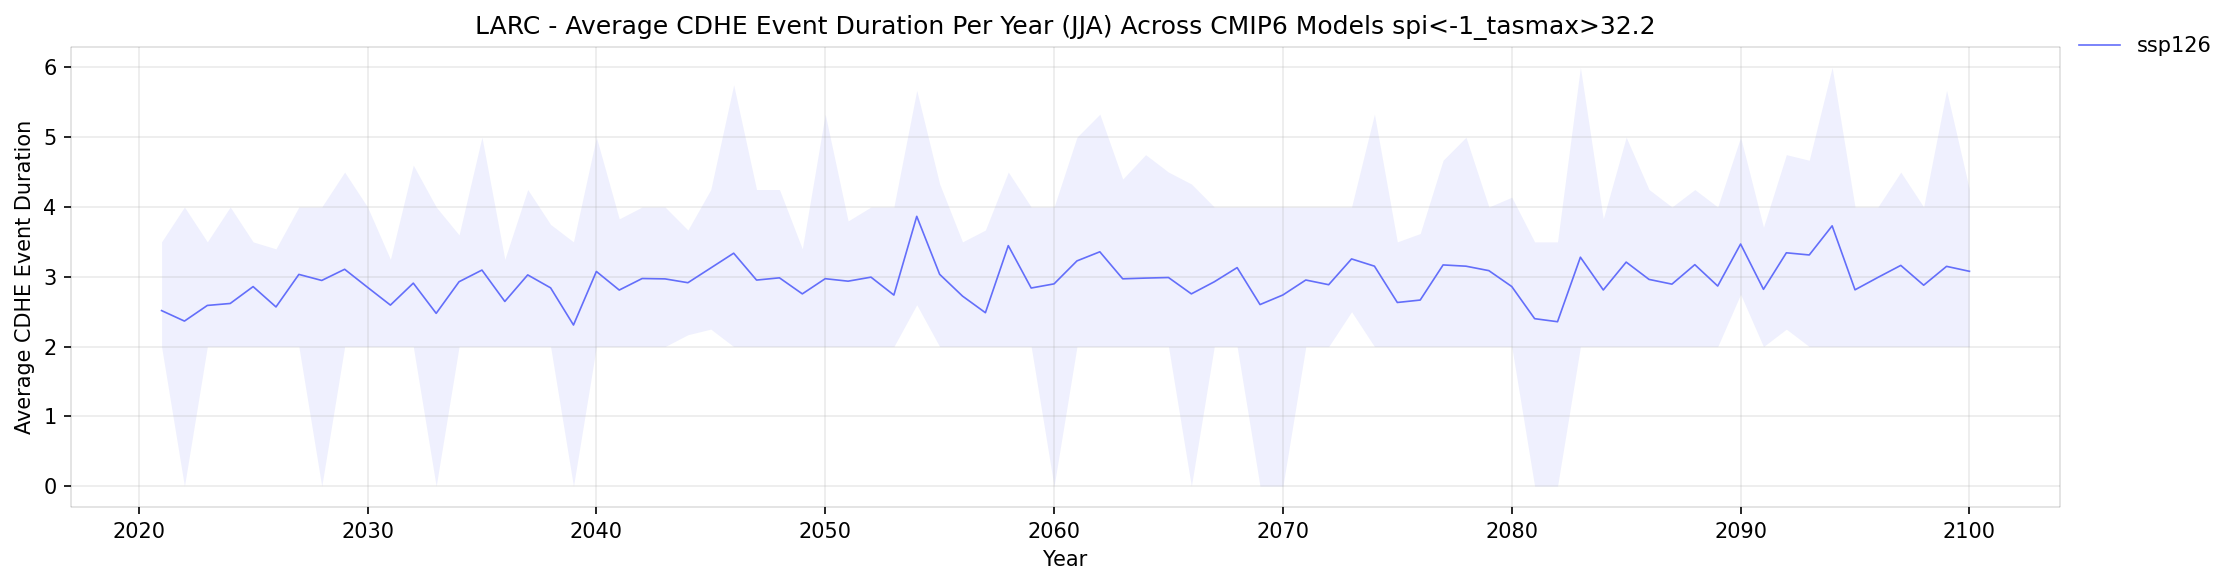

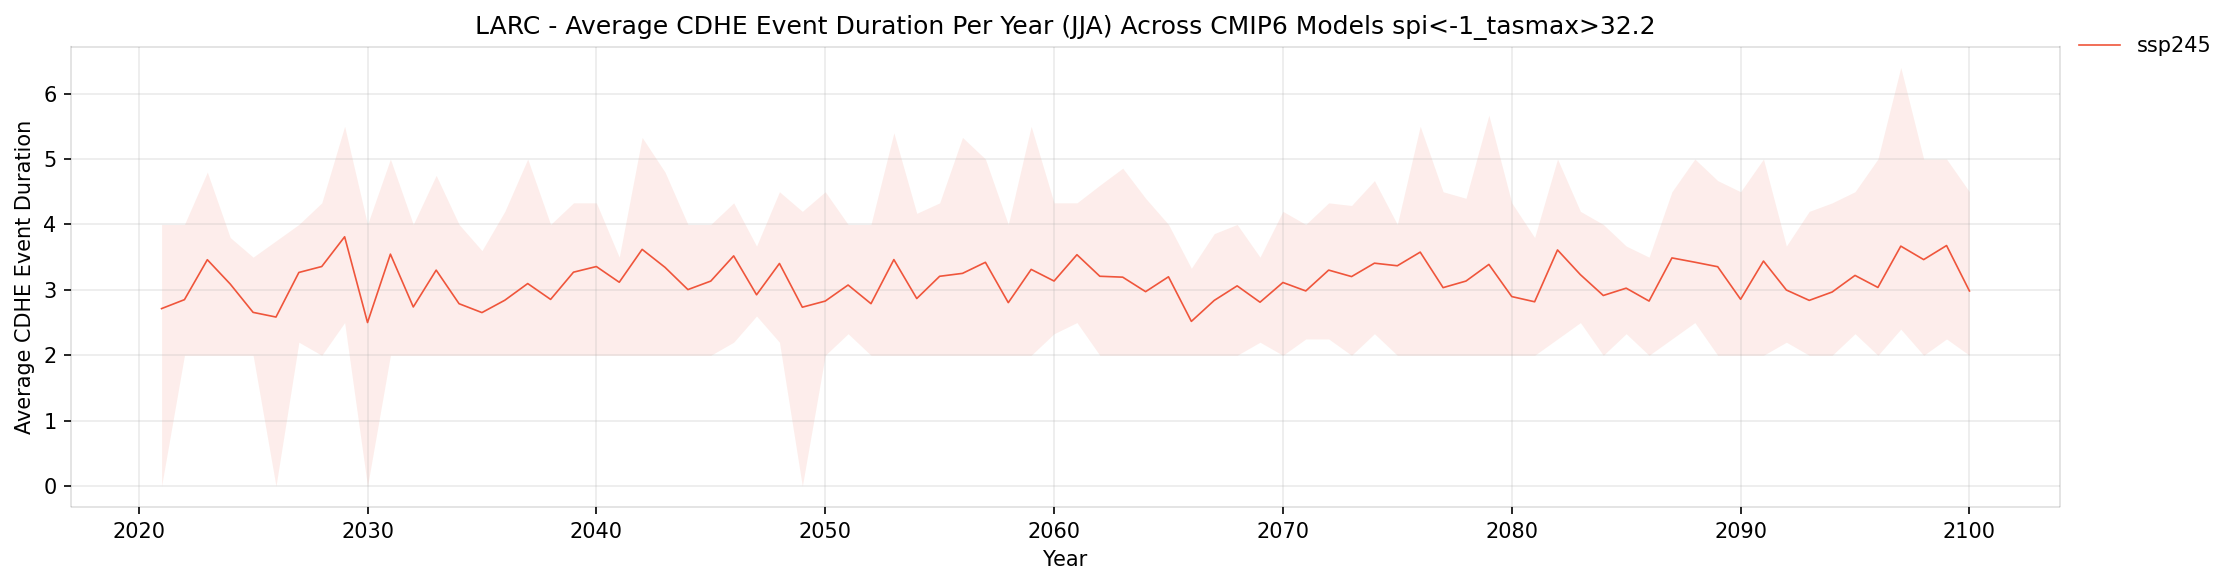

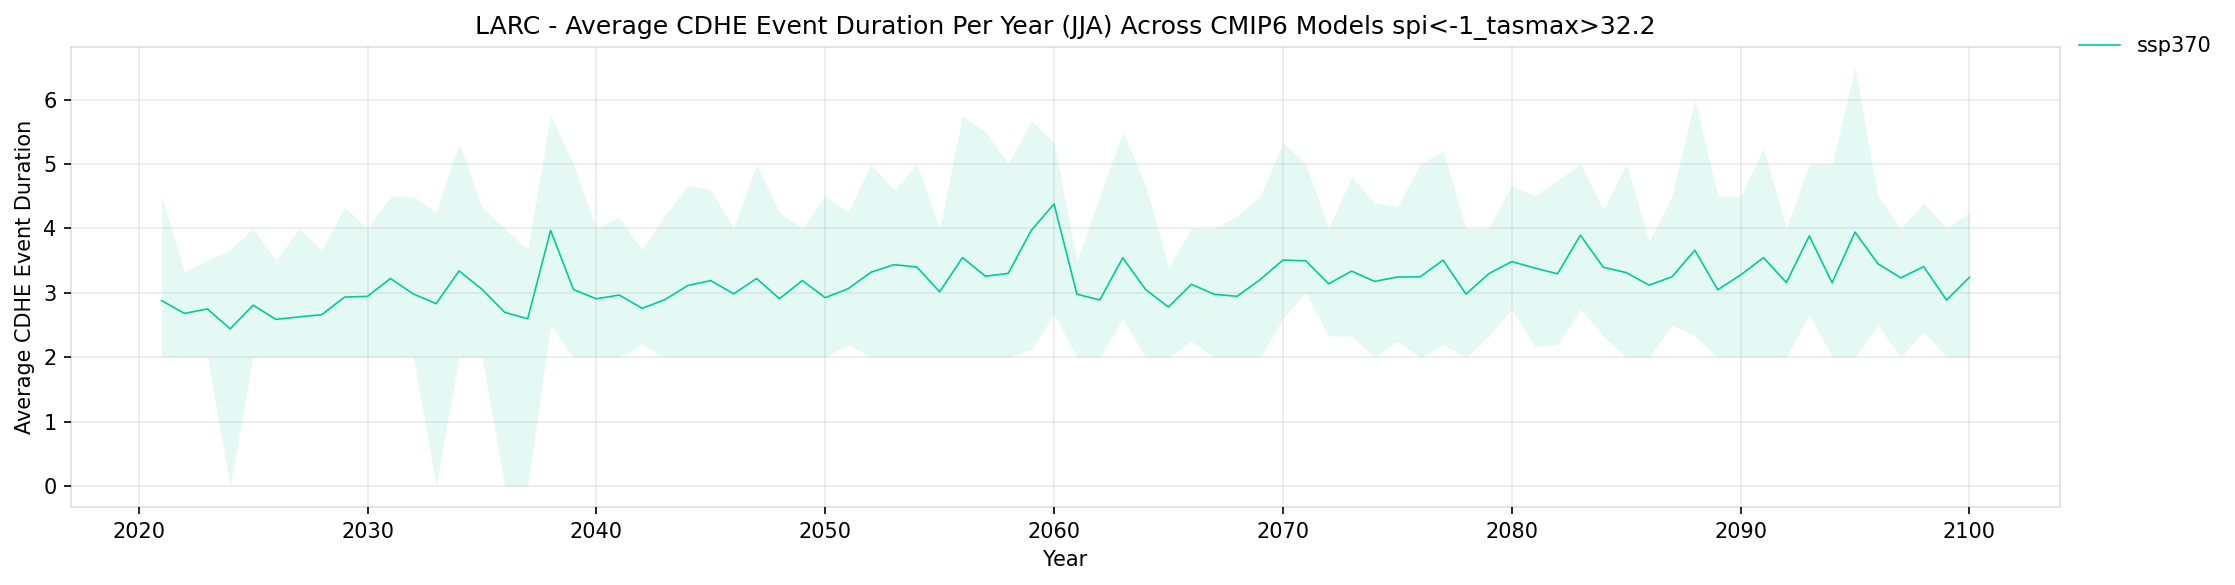

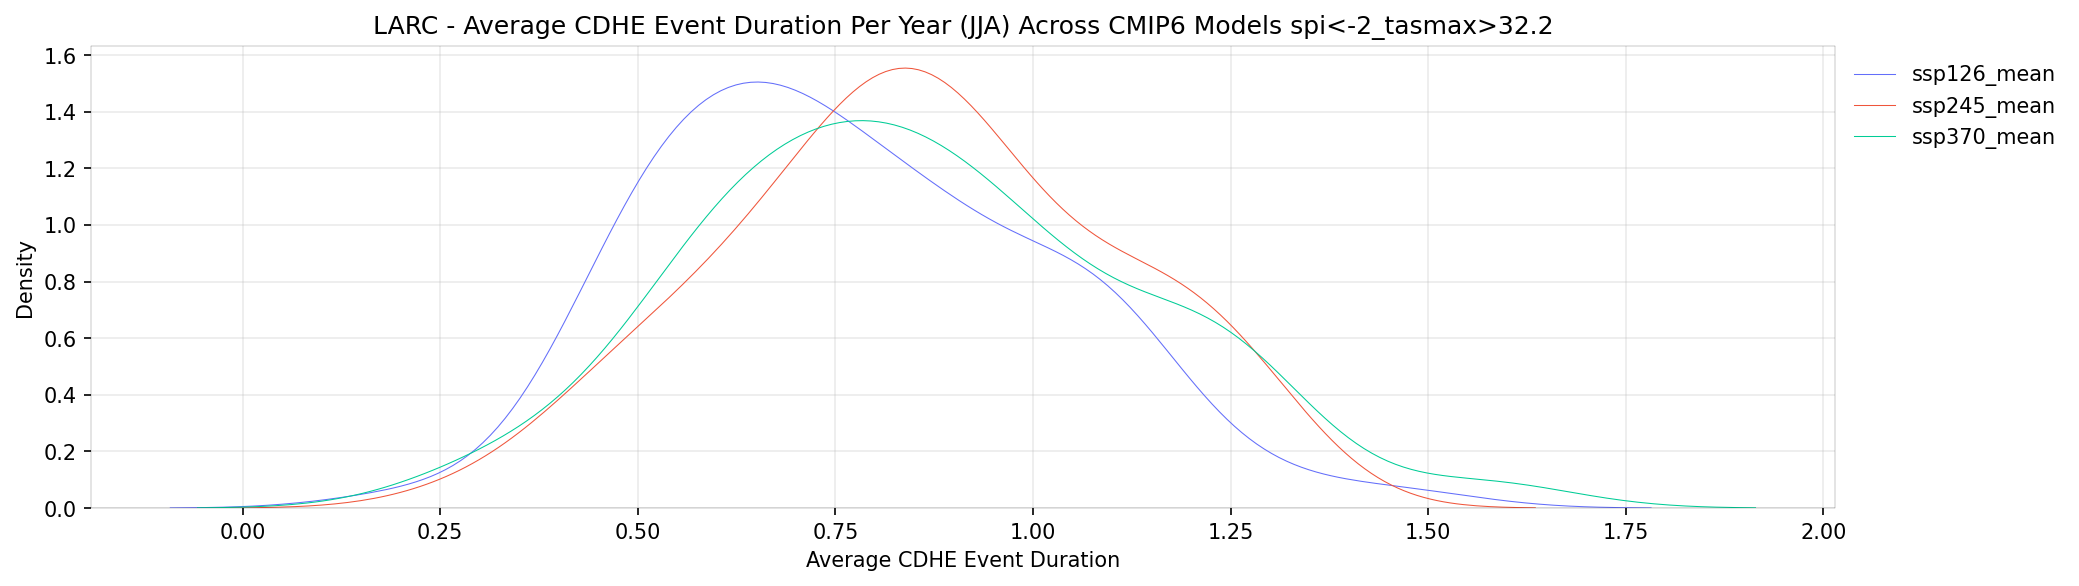

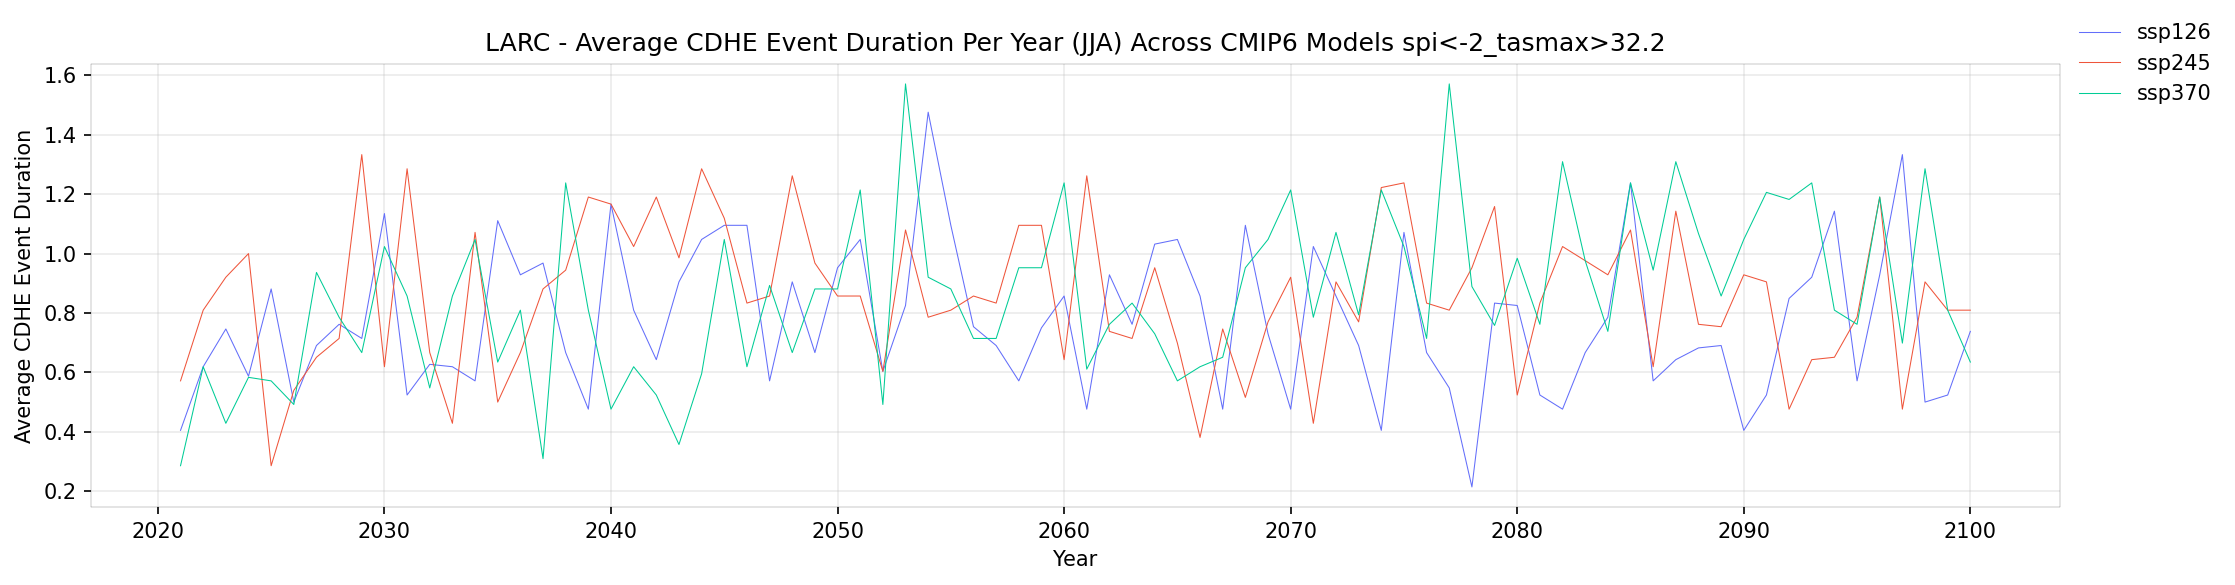

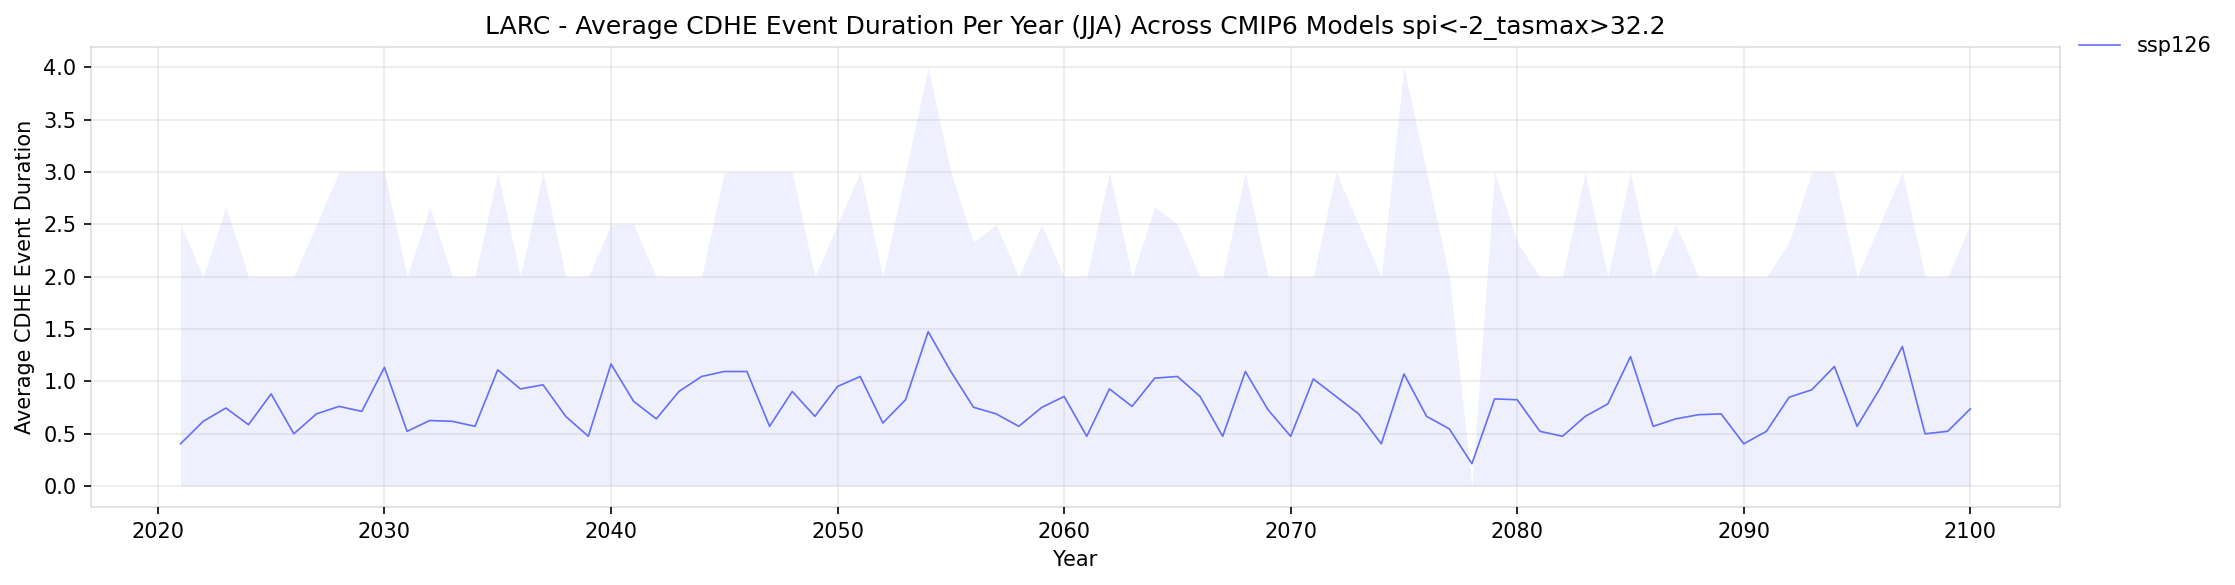

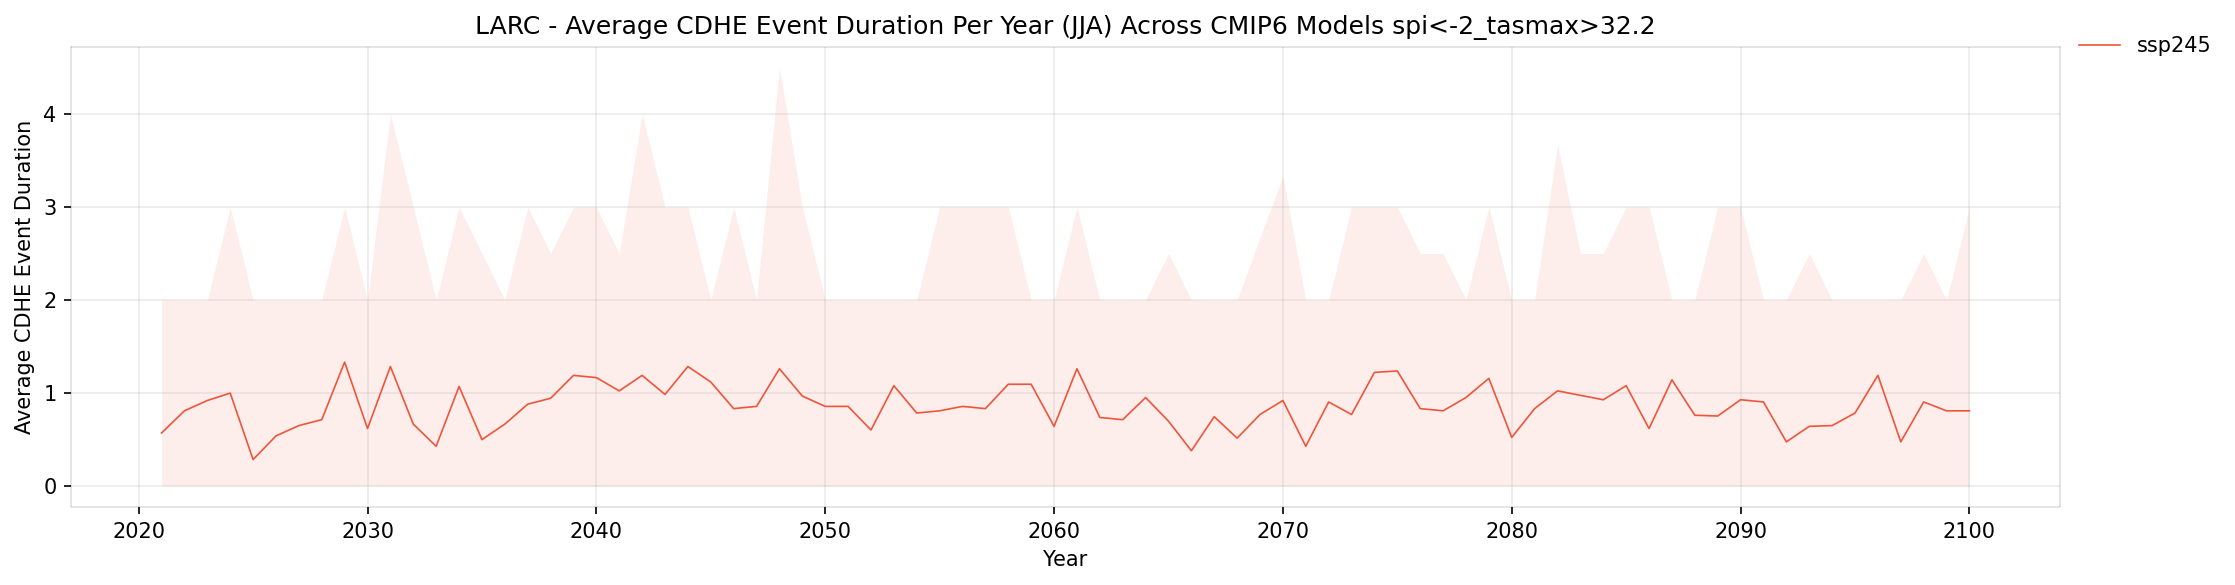

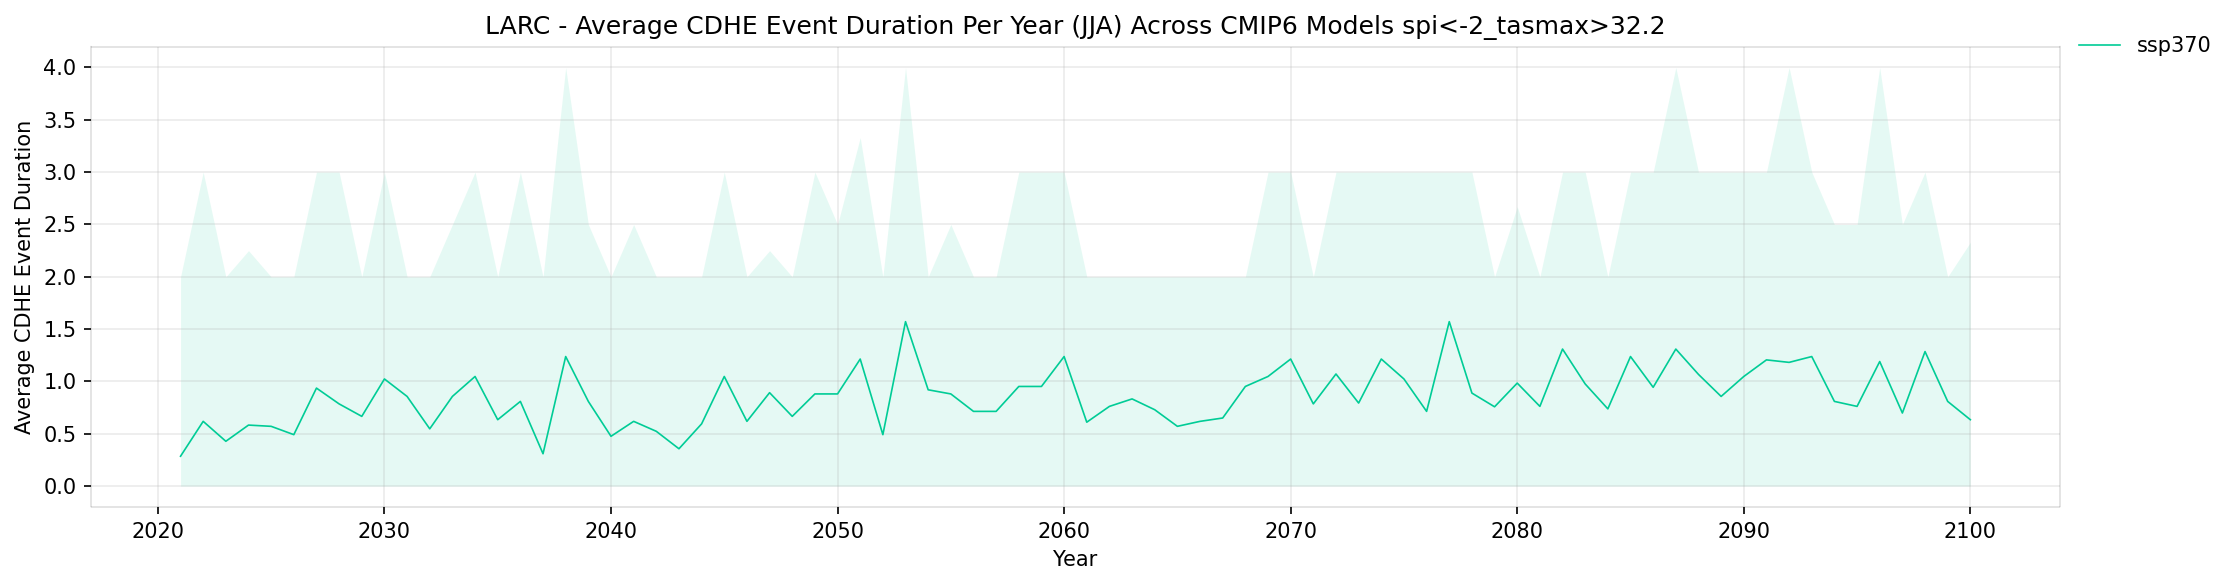

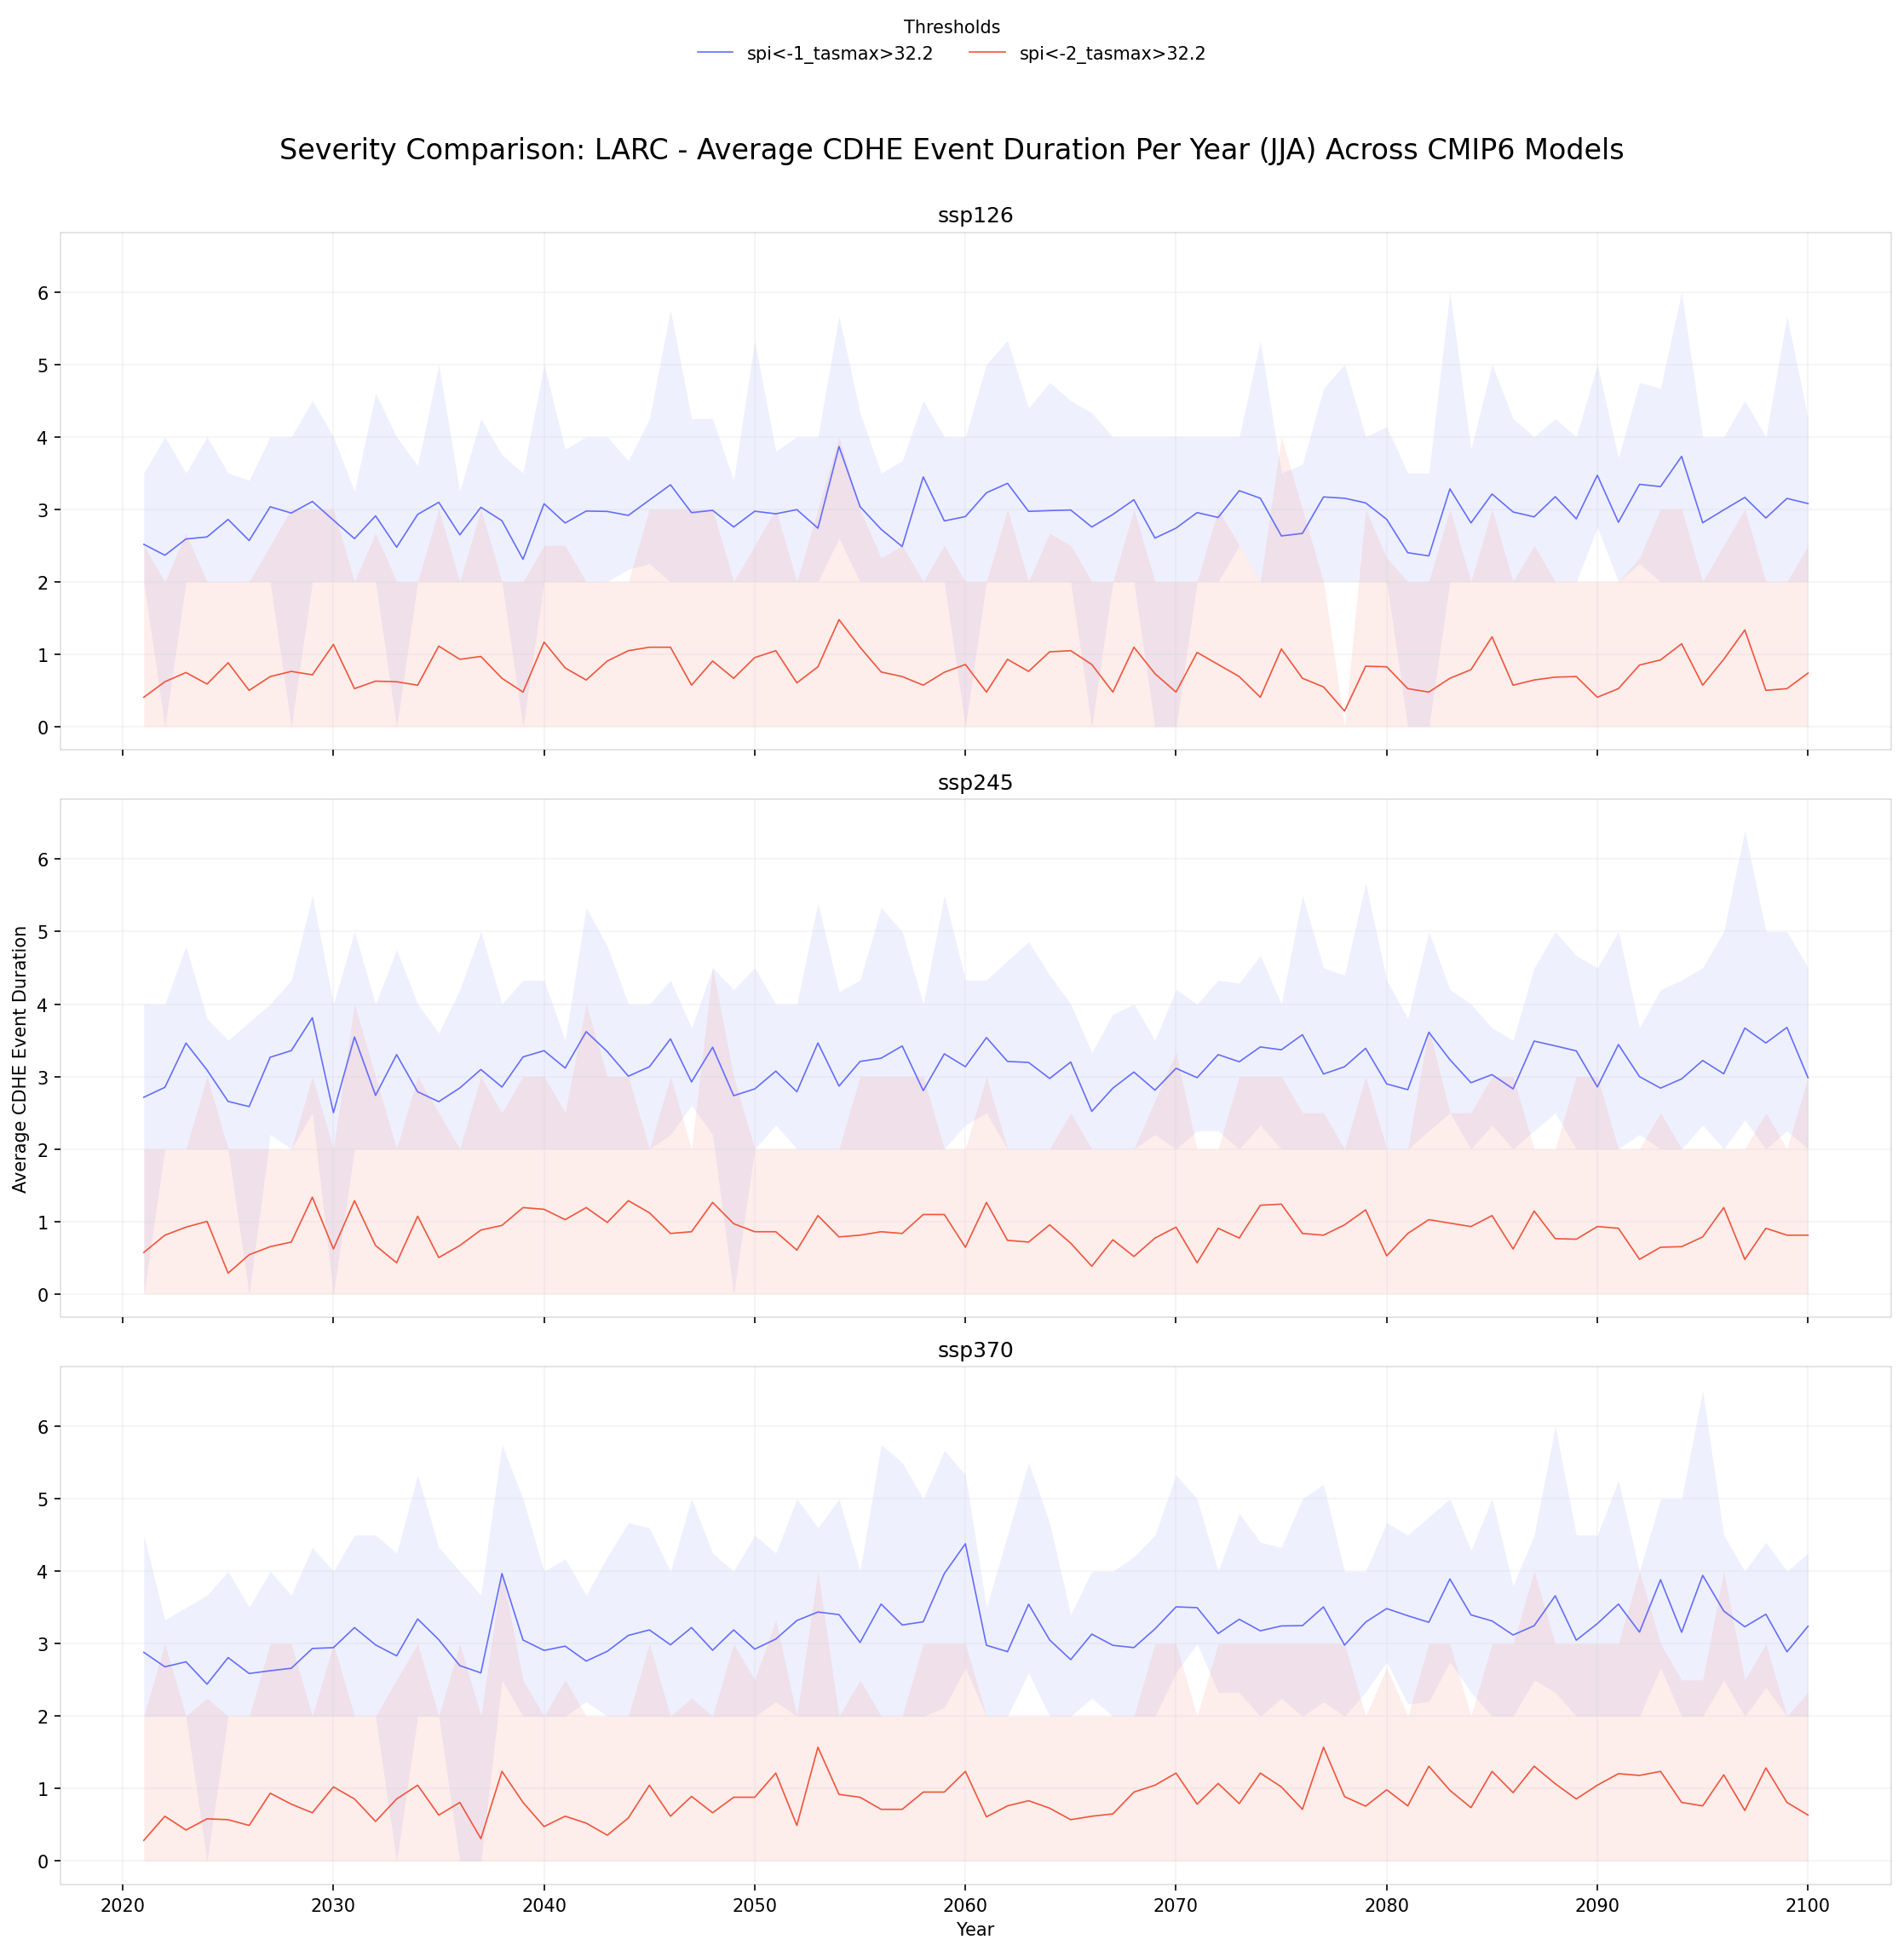

In [9]:
# Average Compound Event Duration
m = '_duration_mean$'
Plot(center, months, metrics[m], m).all(results, plotly)

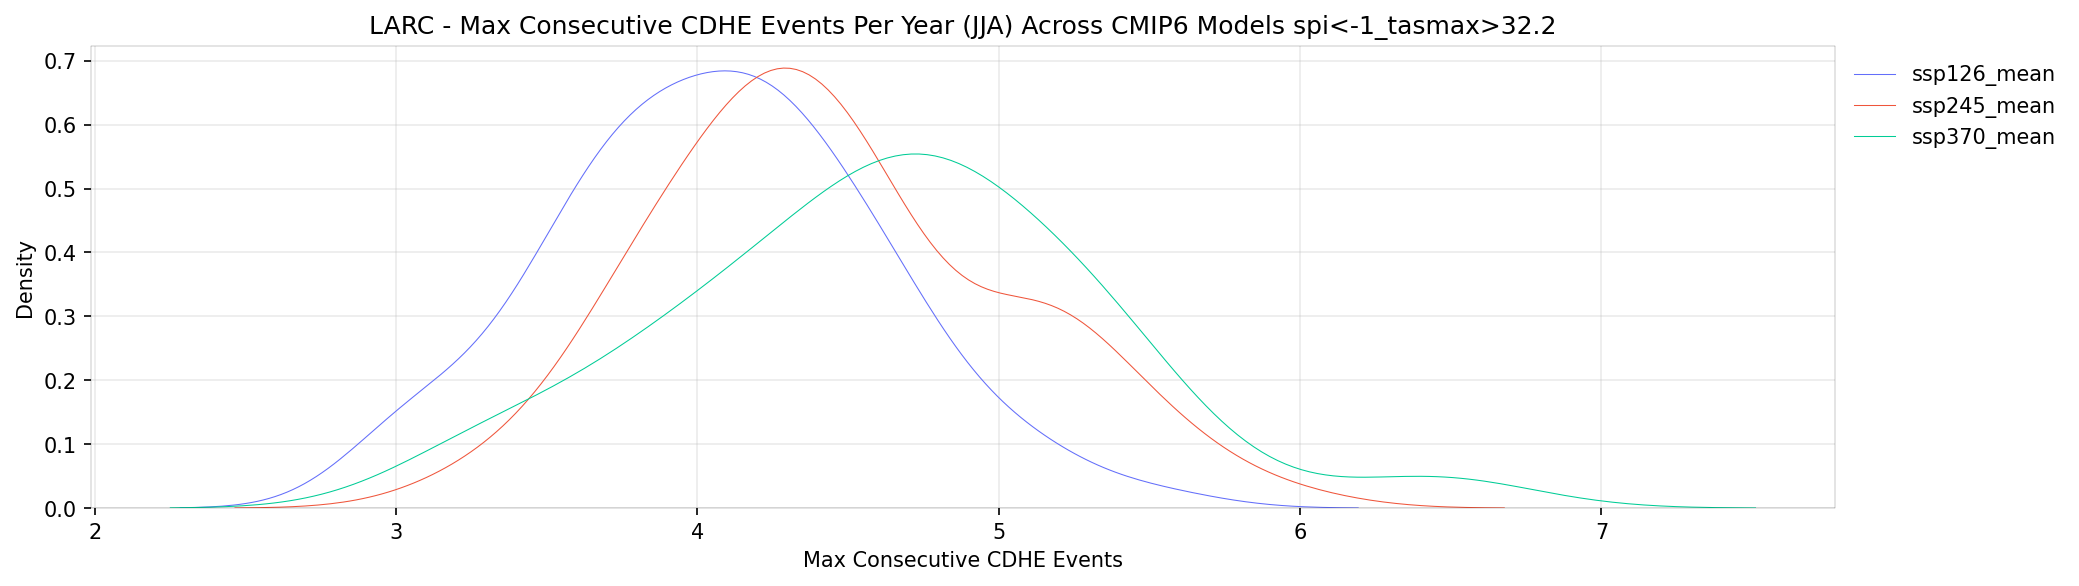

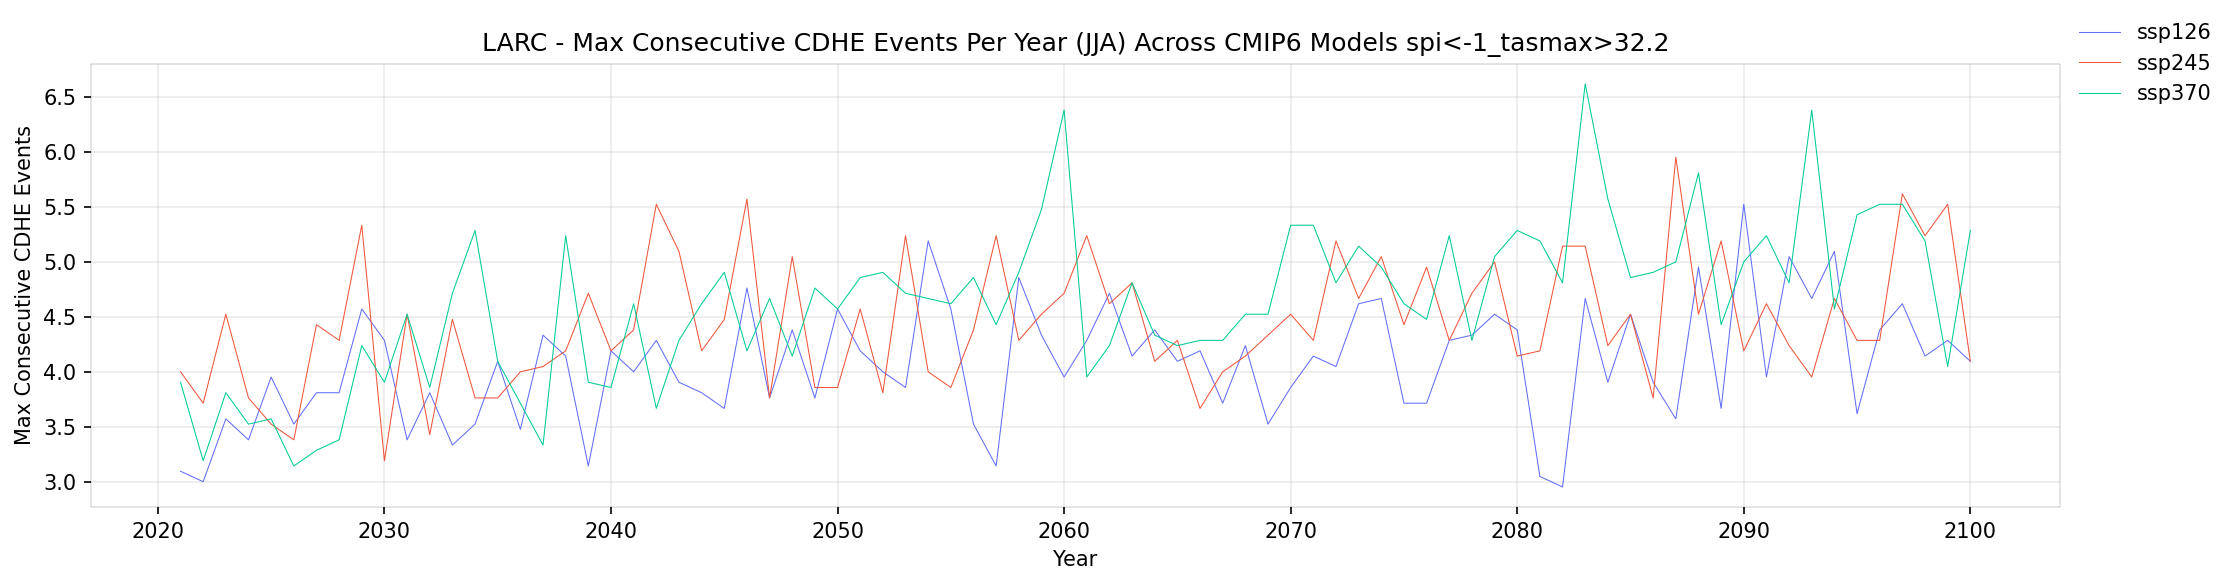

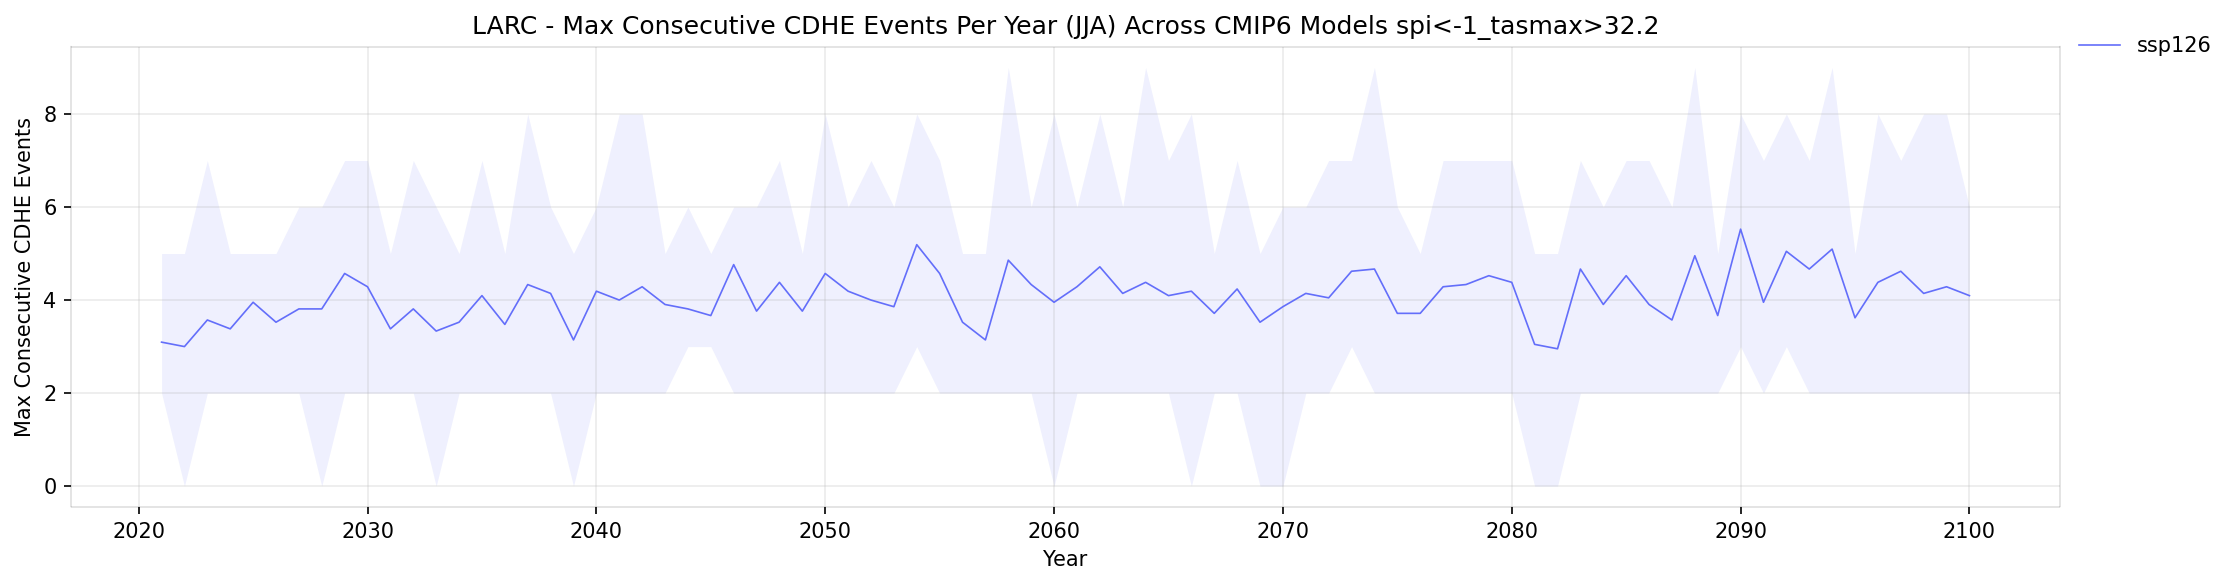

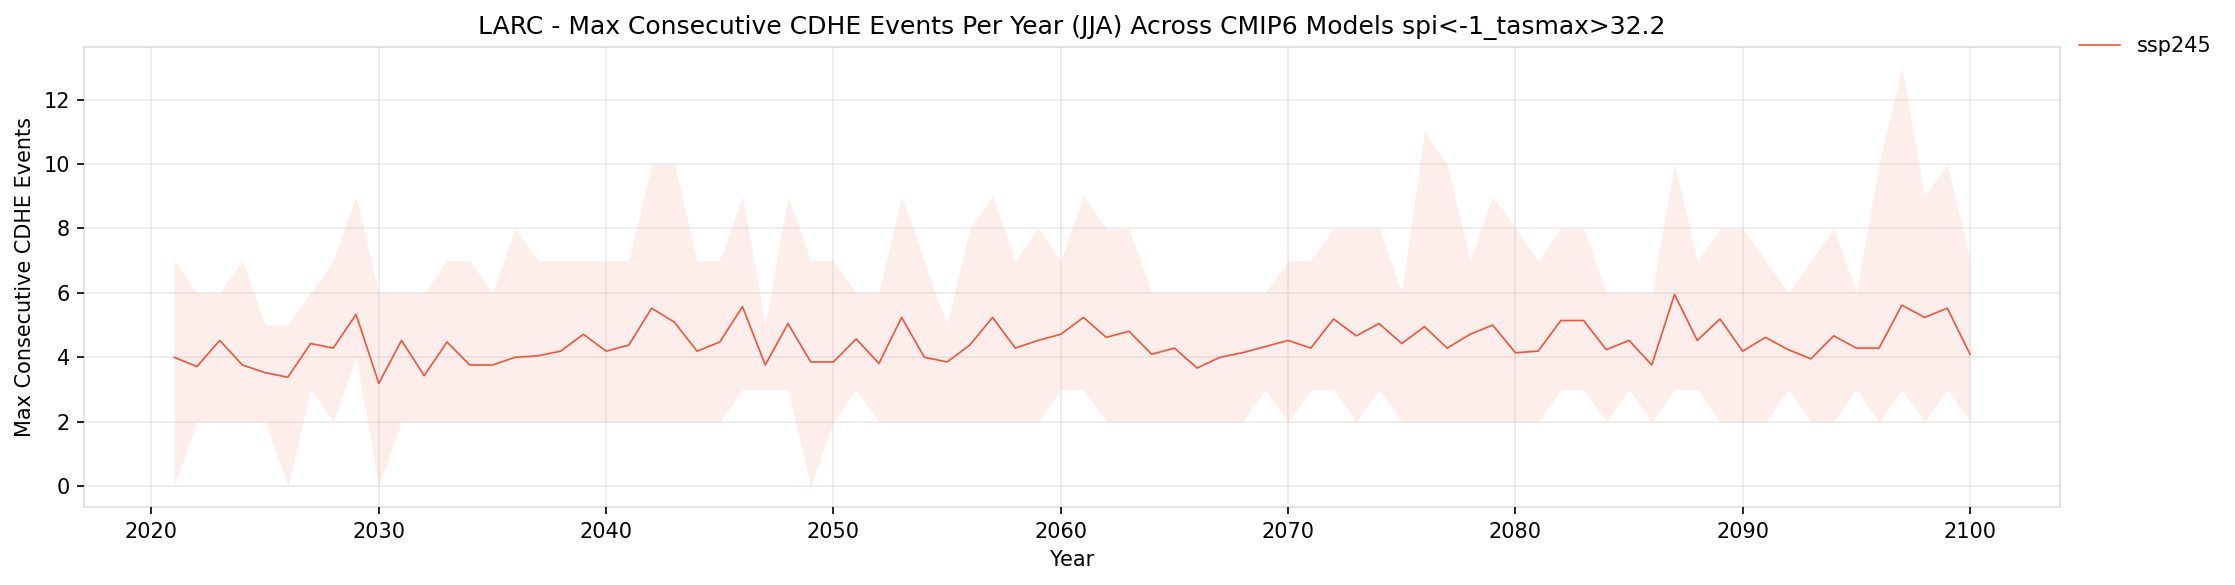

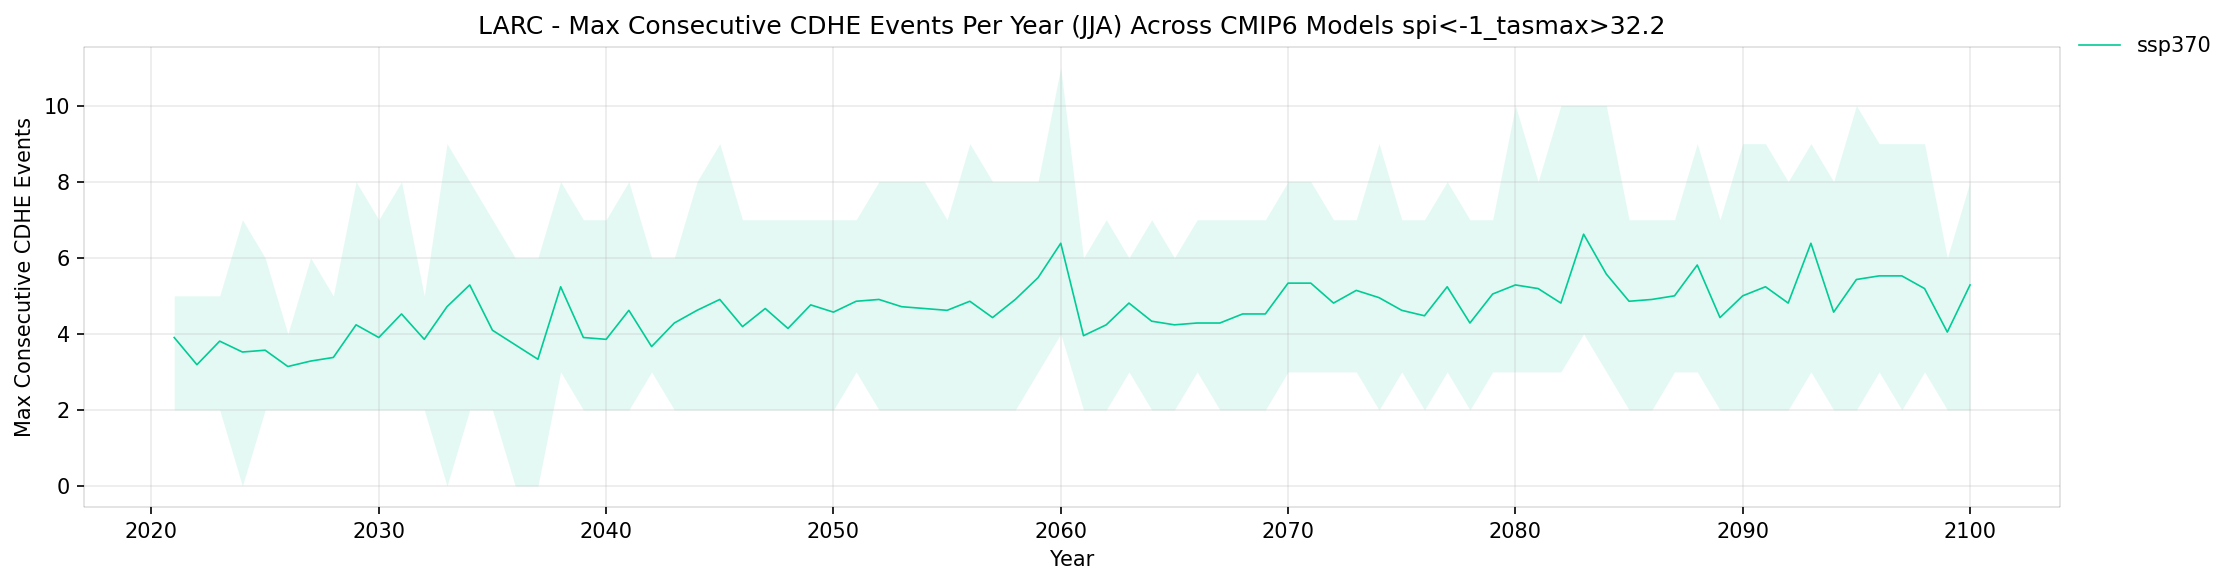

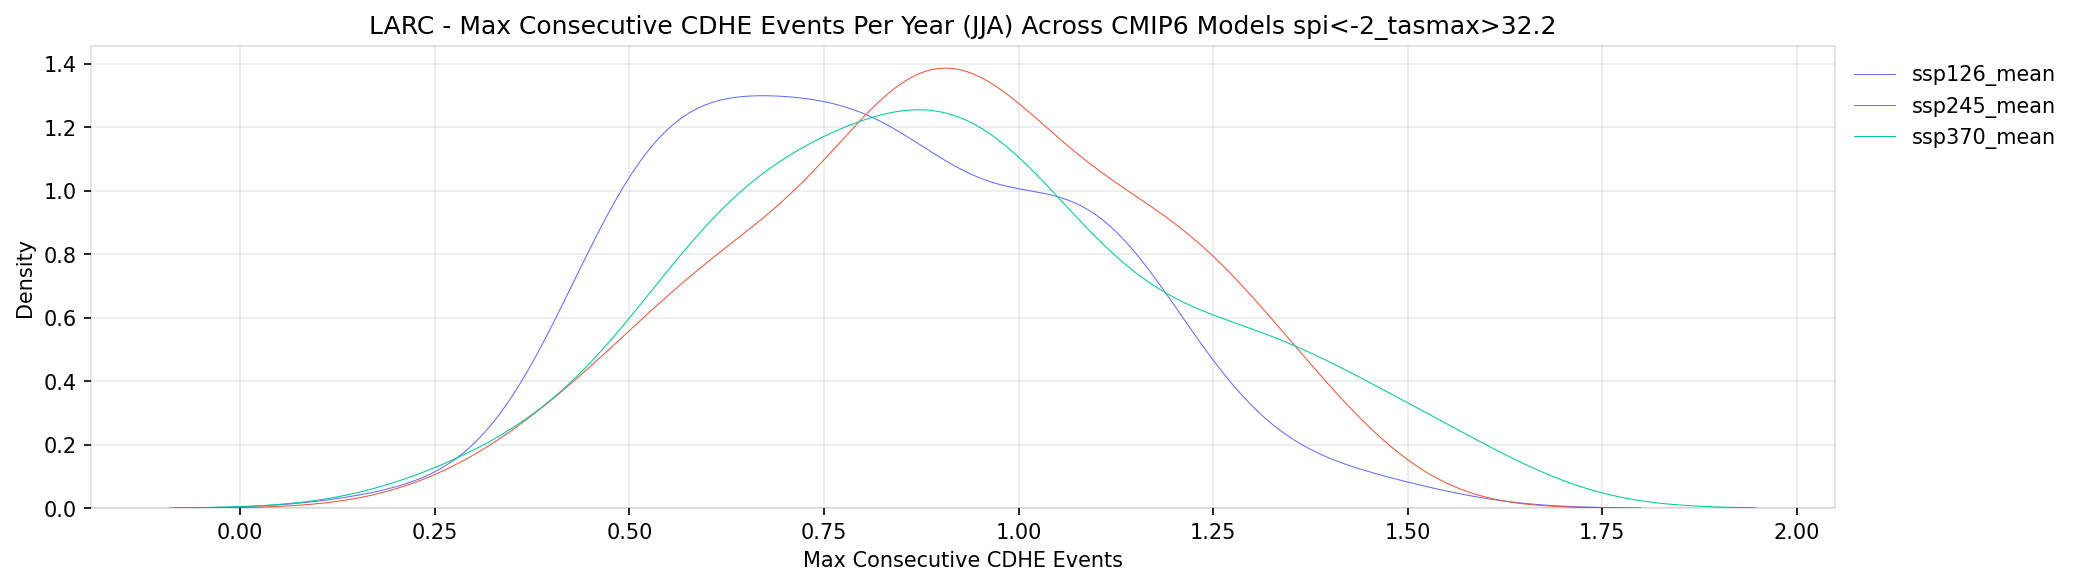

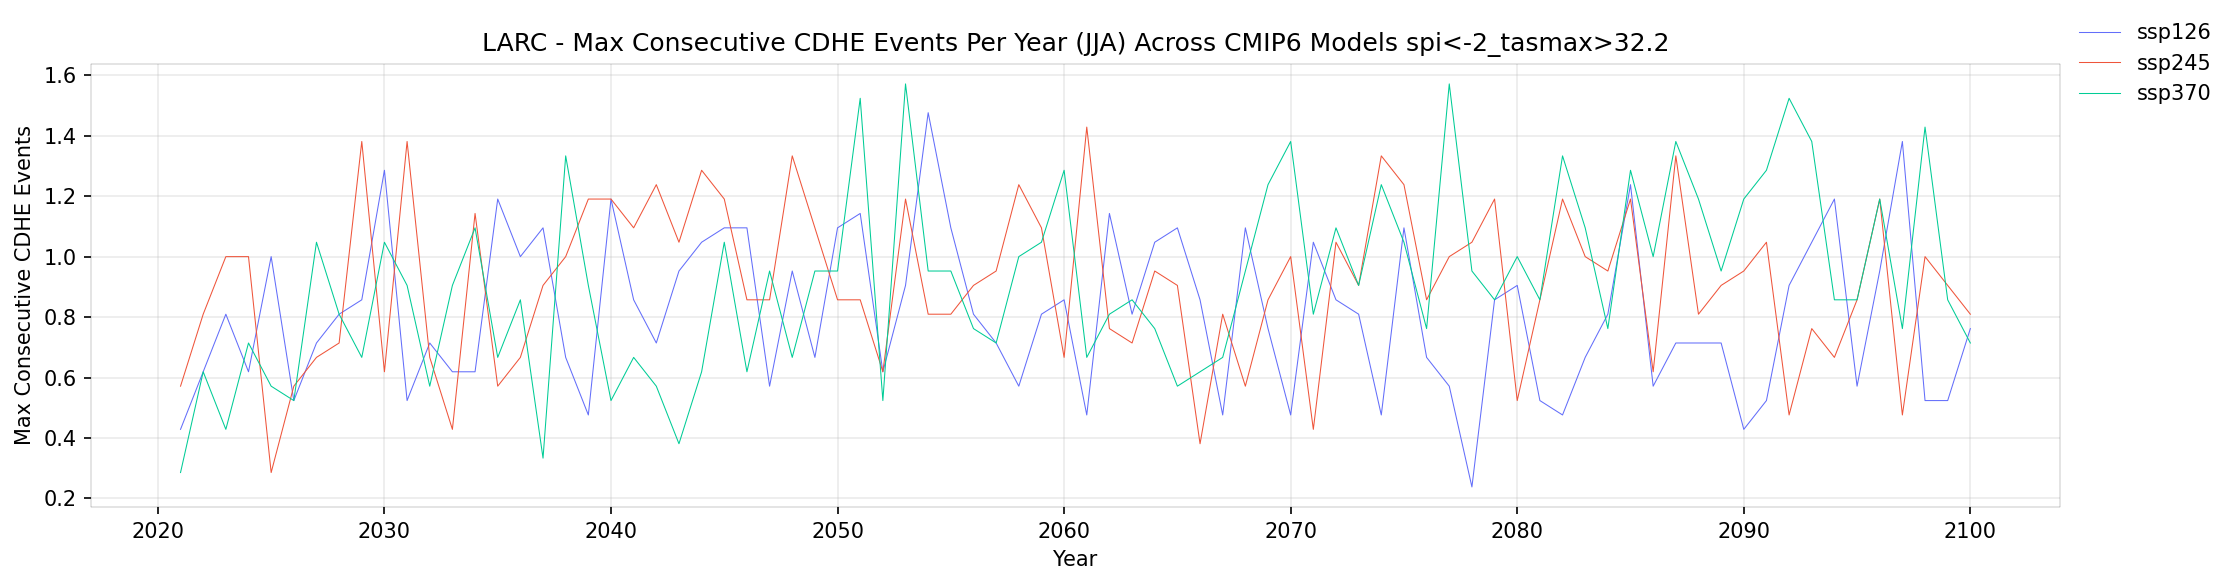

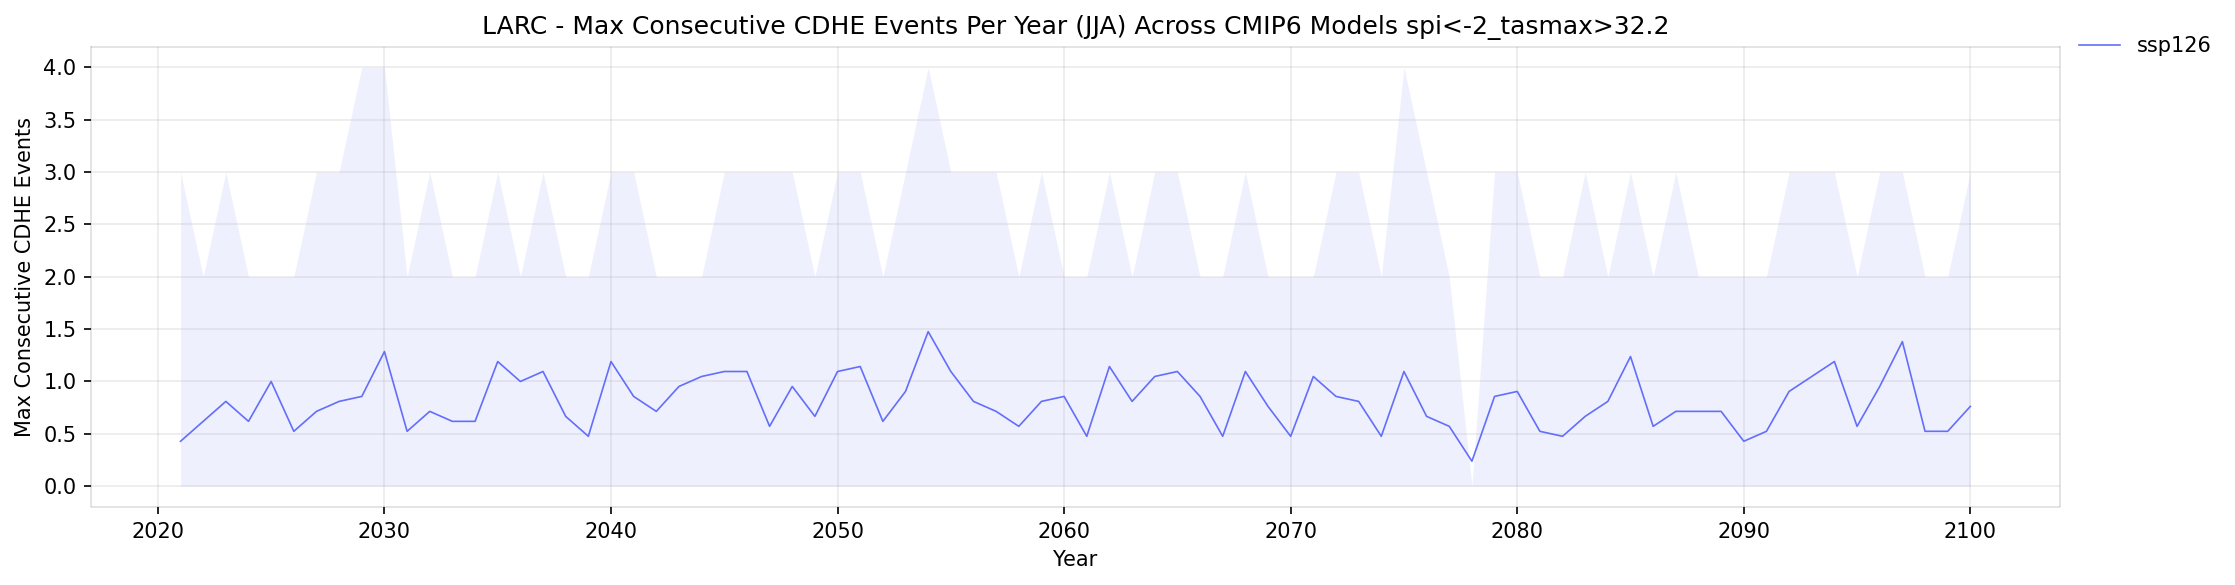

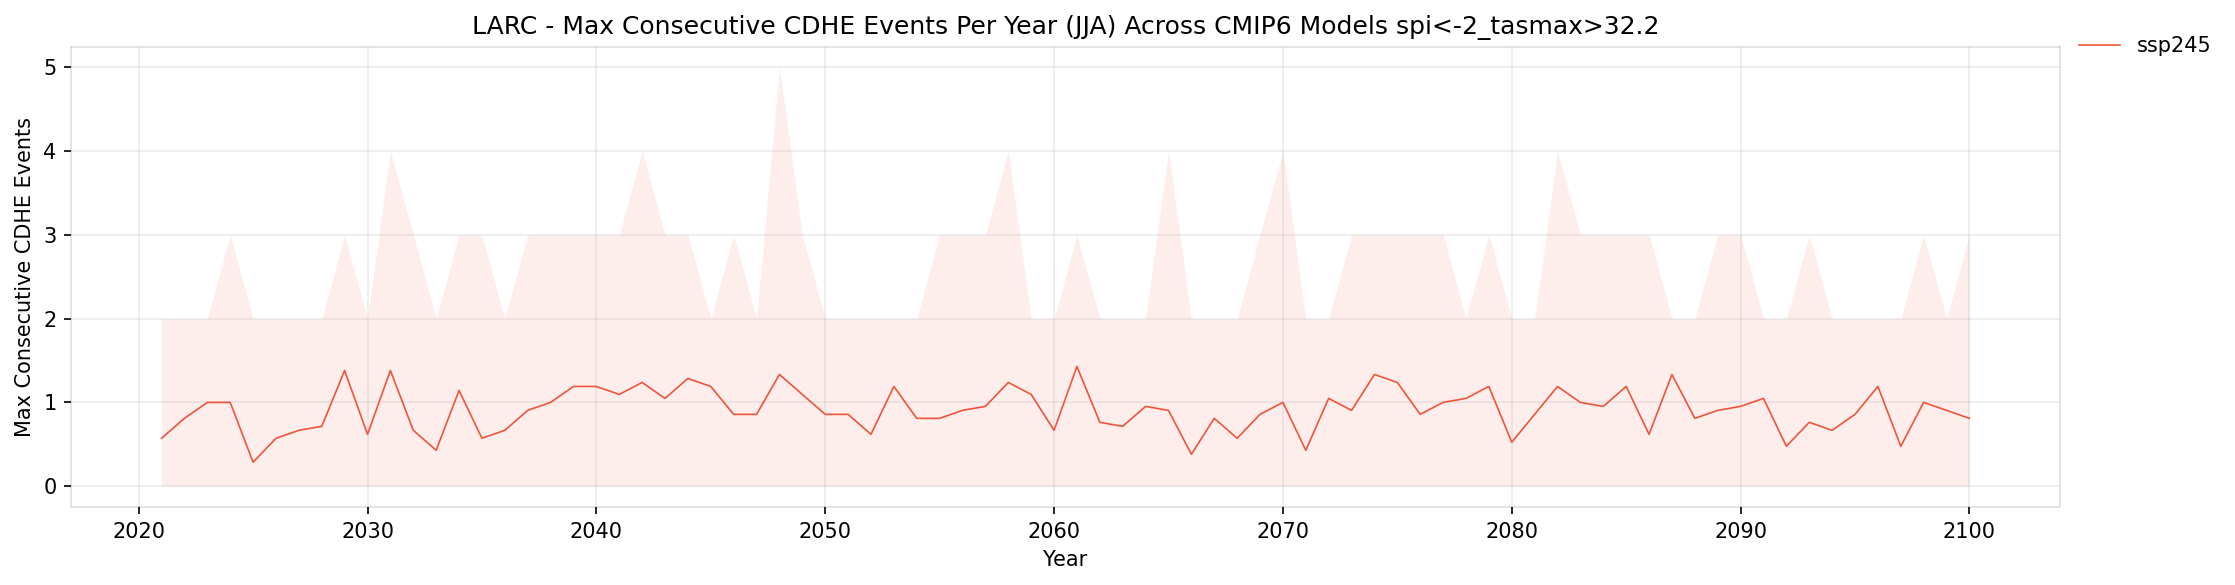

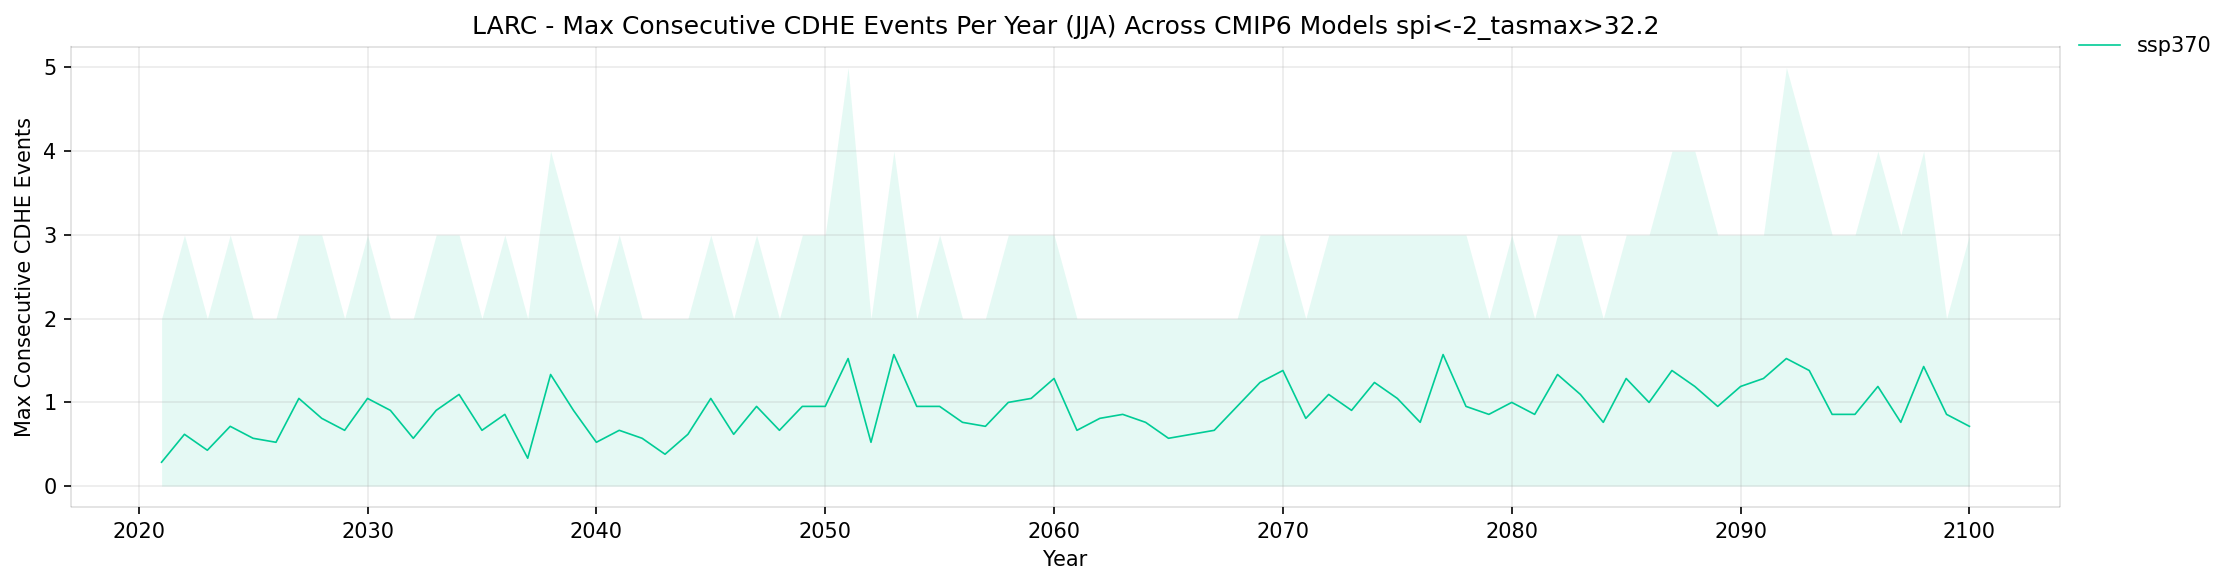

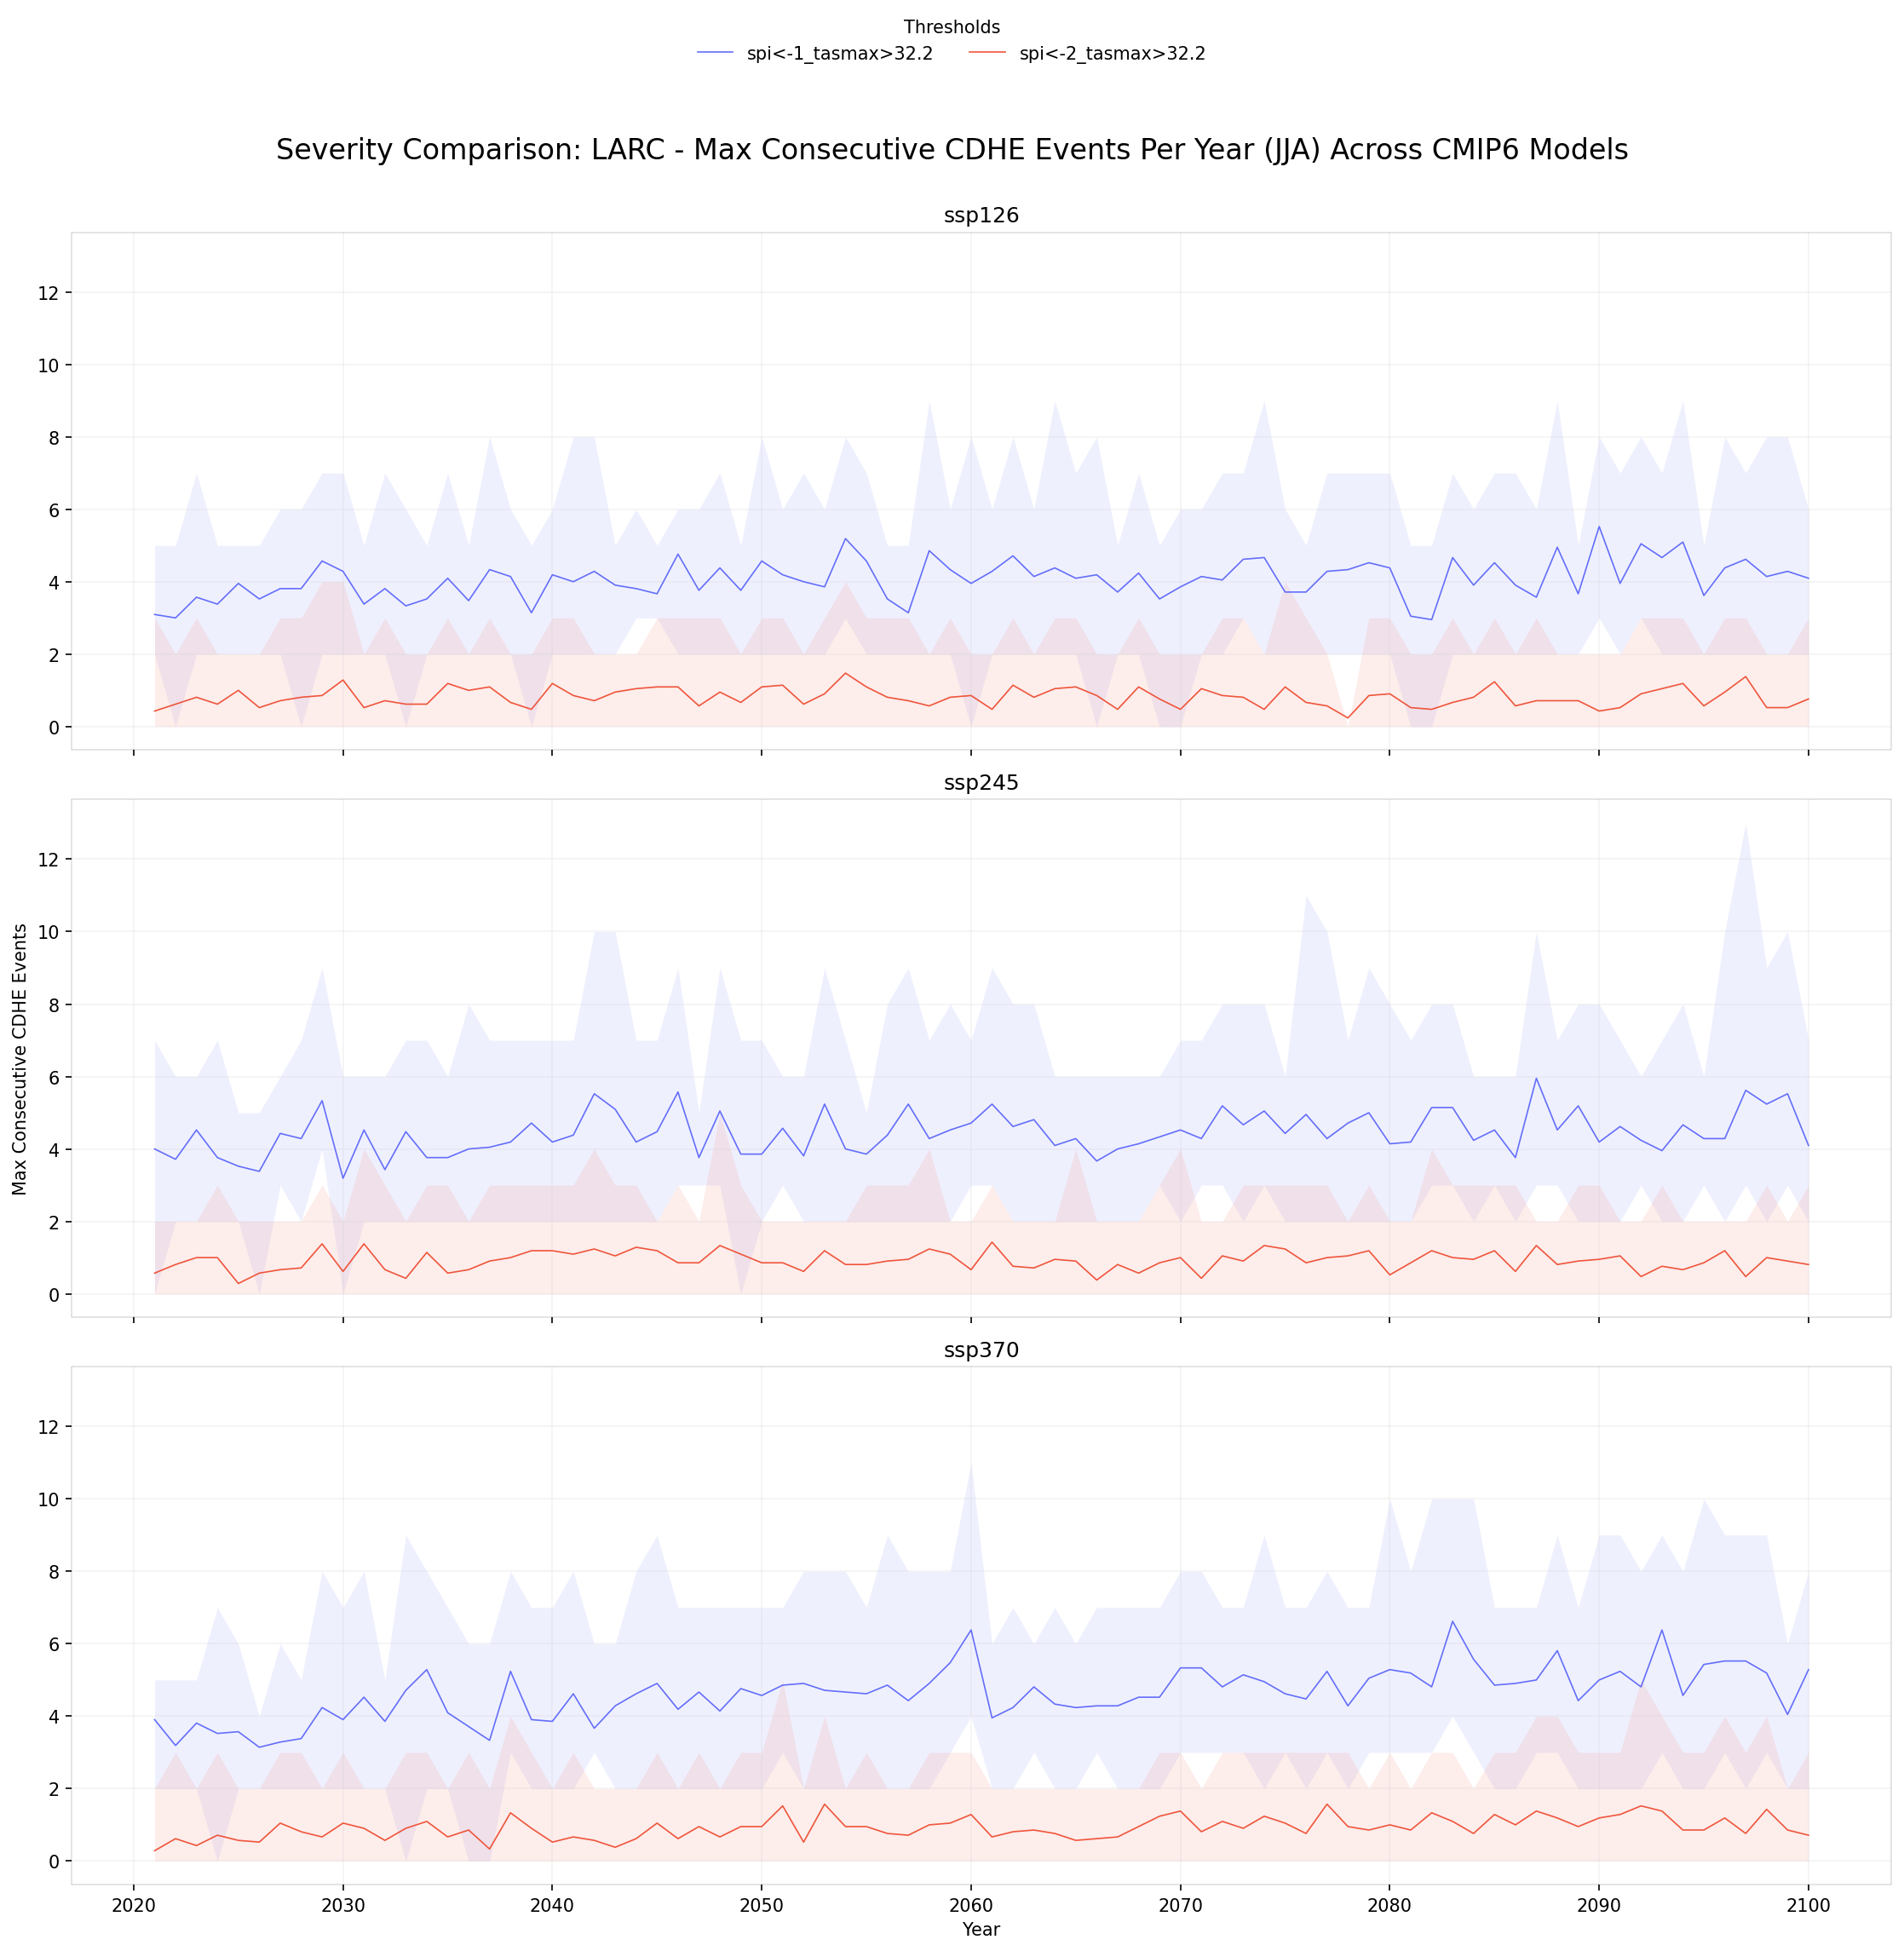

In [10]:
# Max Consecutive Compound Events
m = '_event_max$'
Plot(center, months, metrics[m], m).all(results, plotly)

## Total Event Sequences vs Average Event Duration

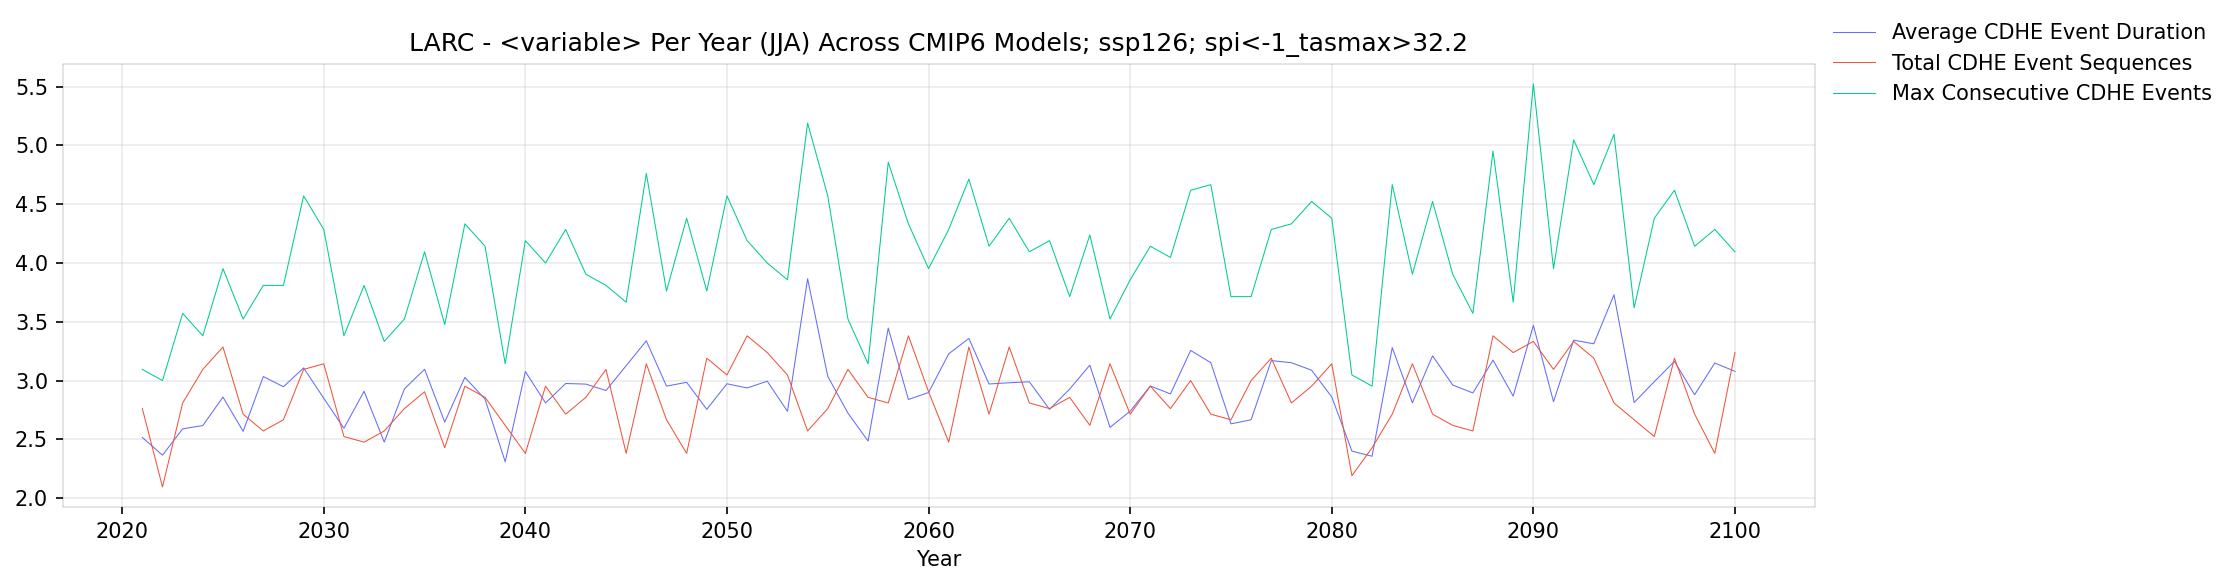

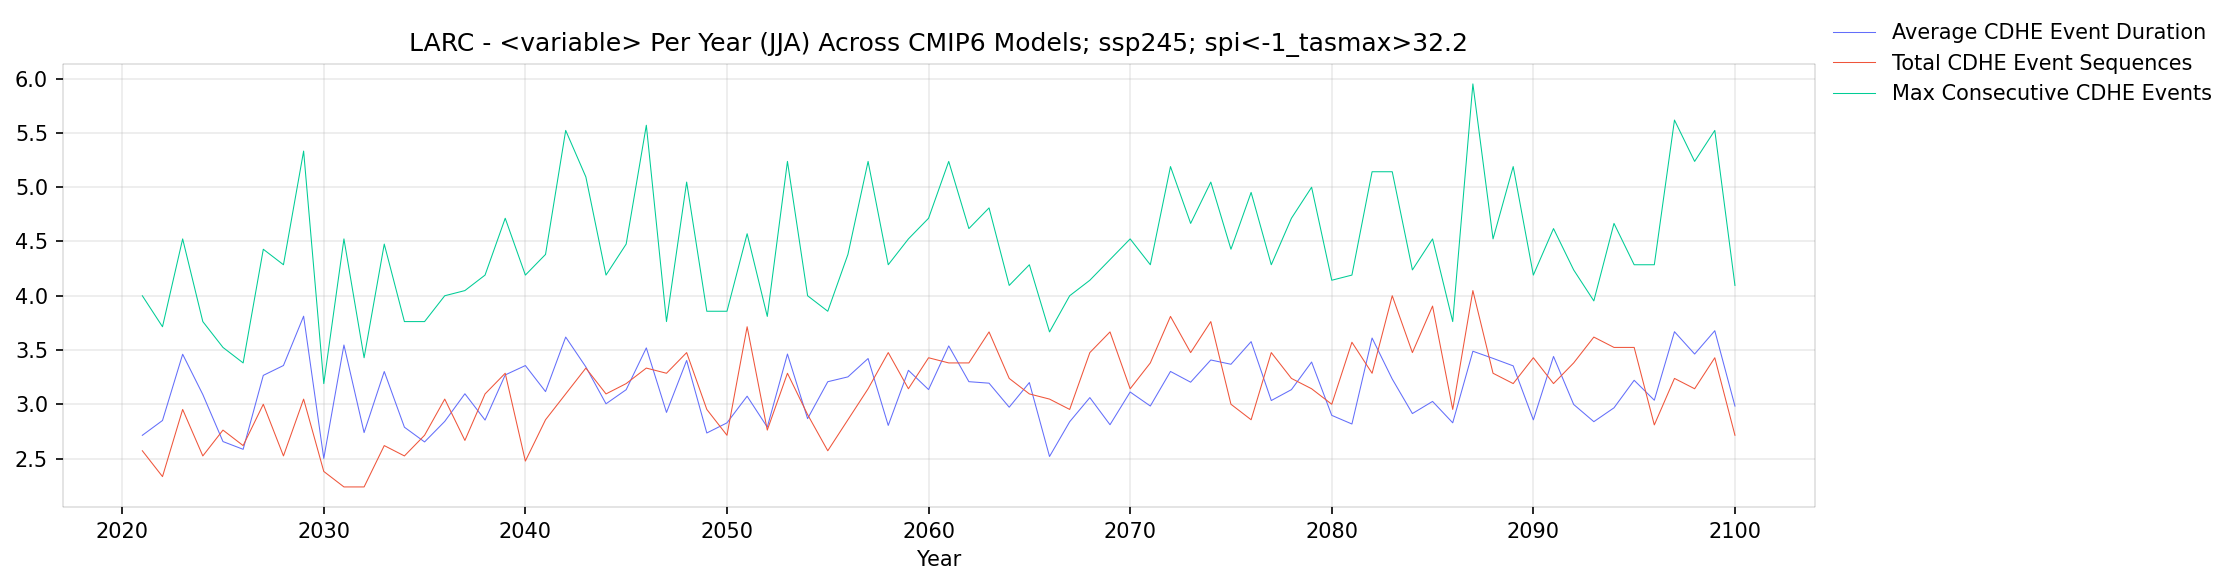

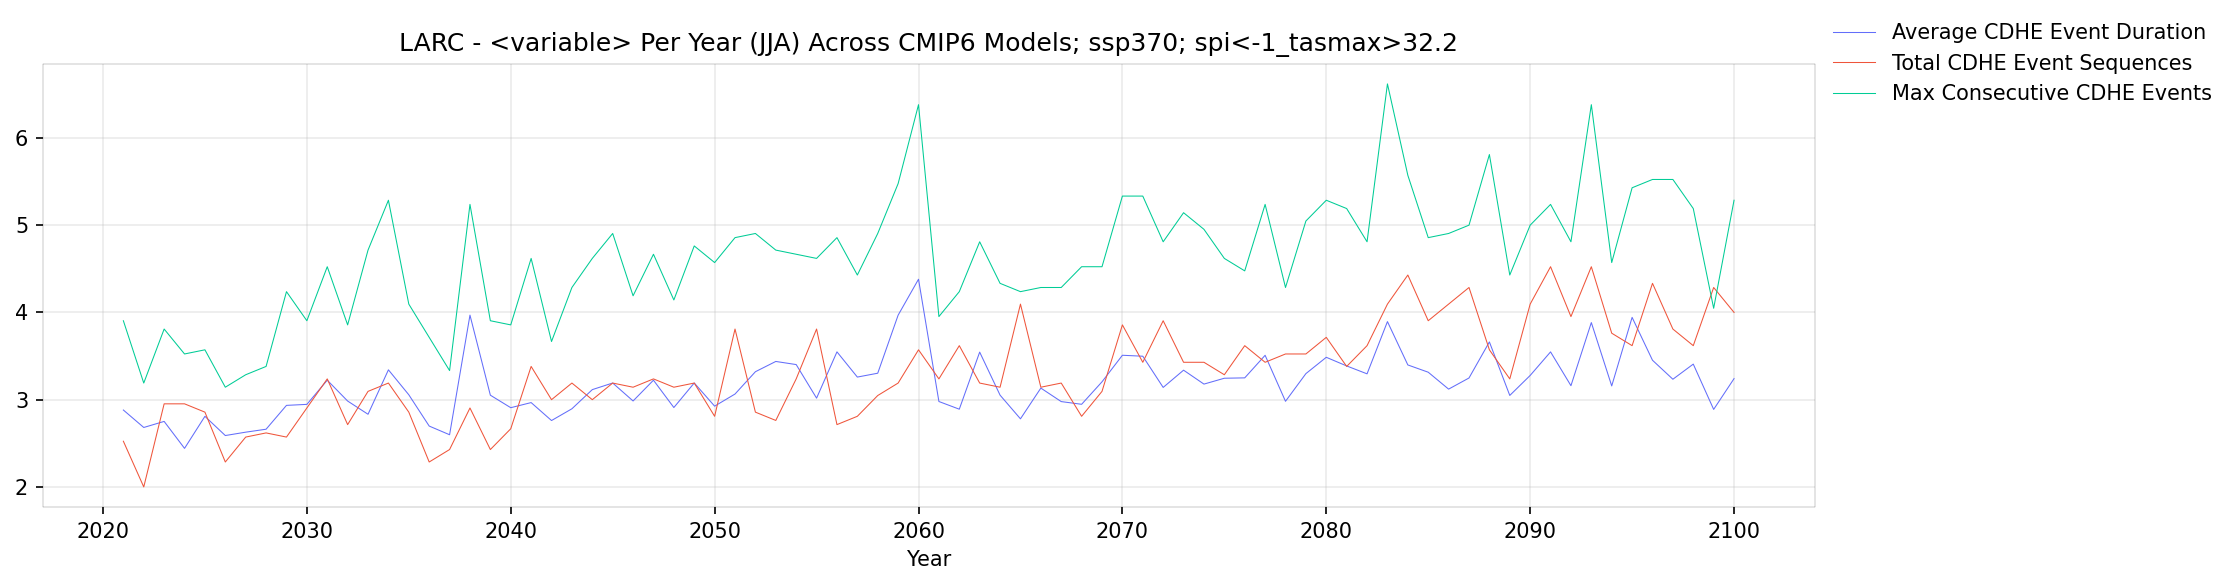

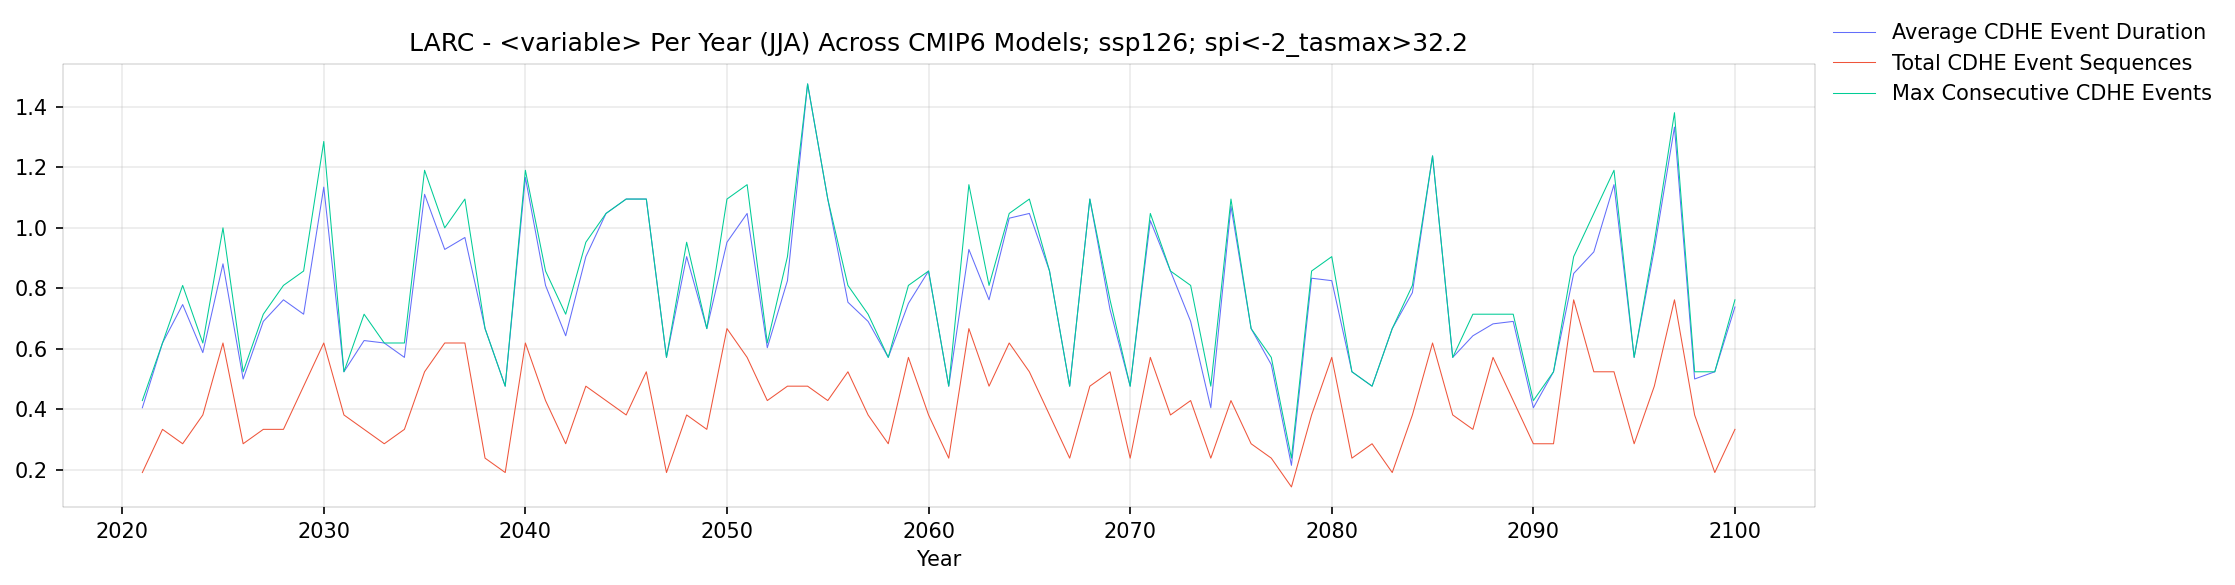

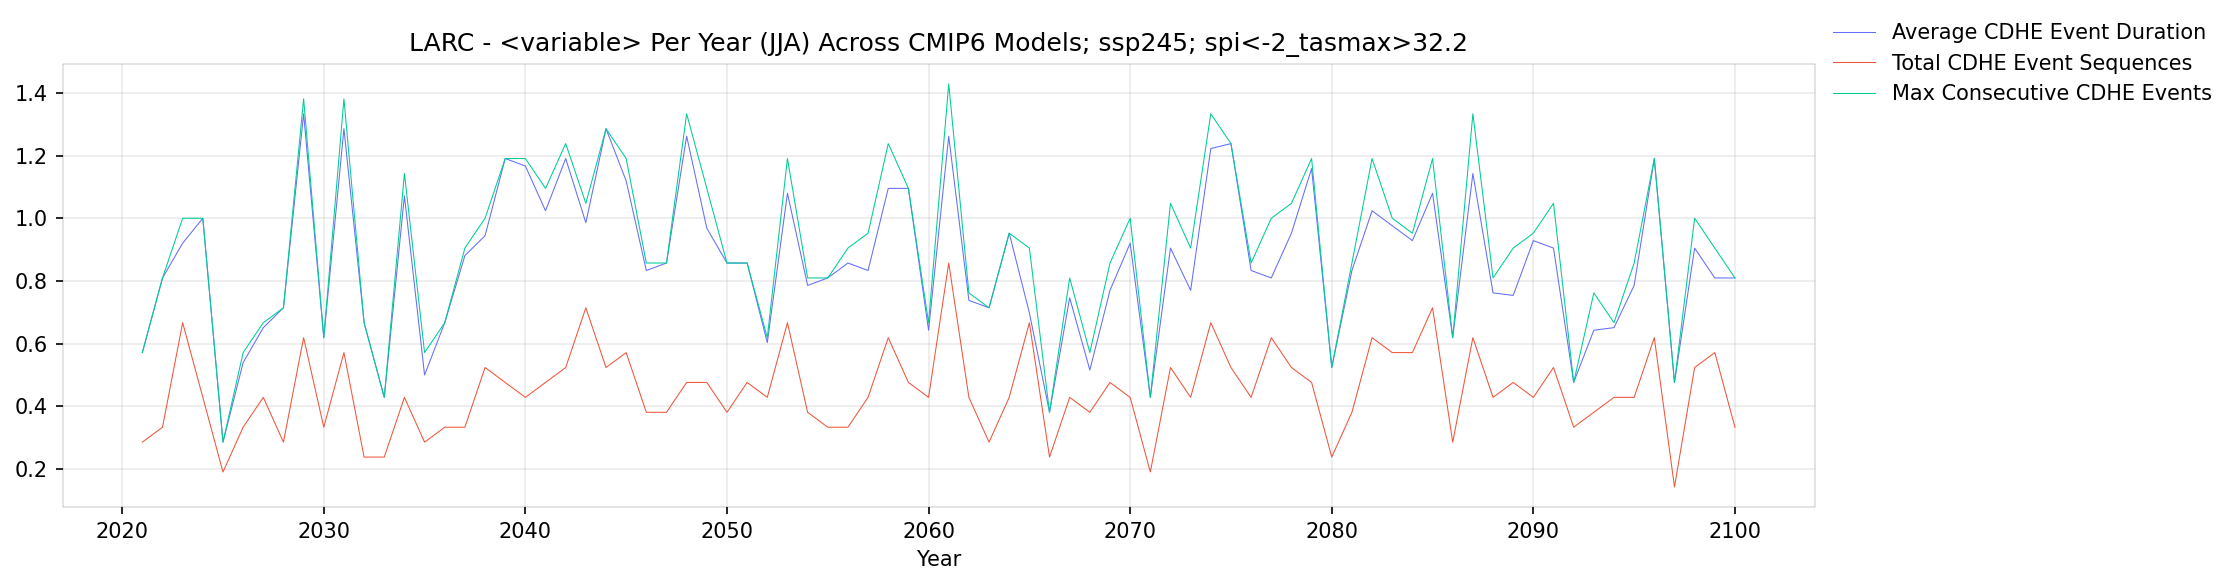

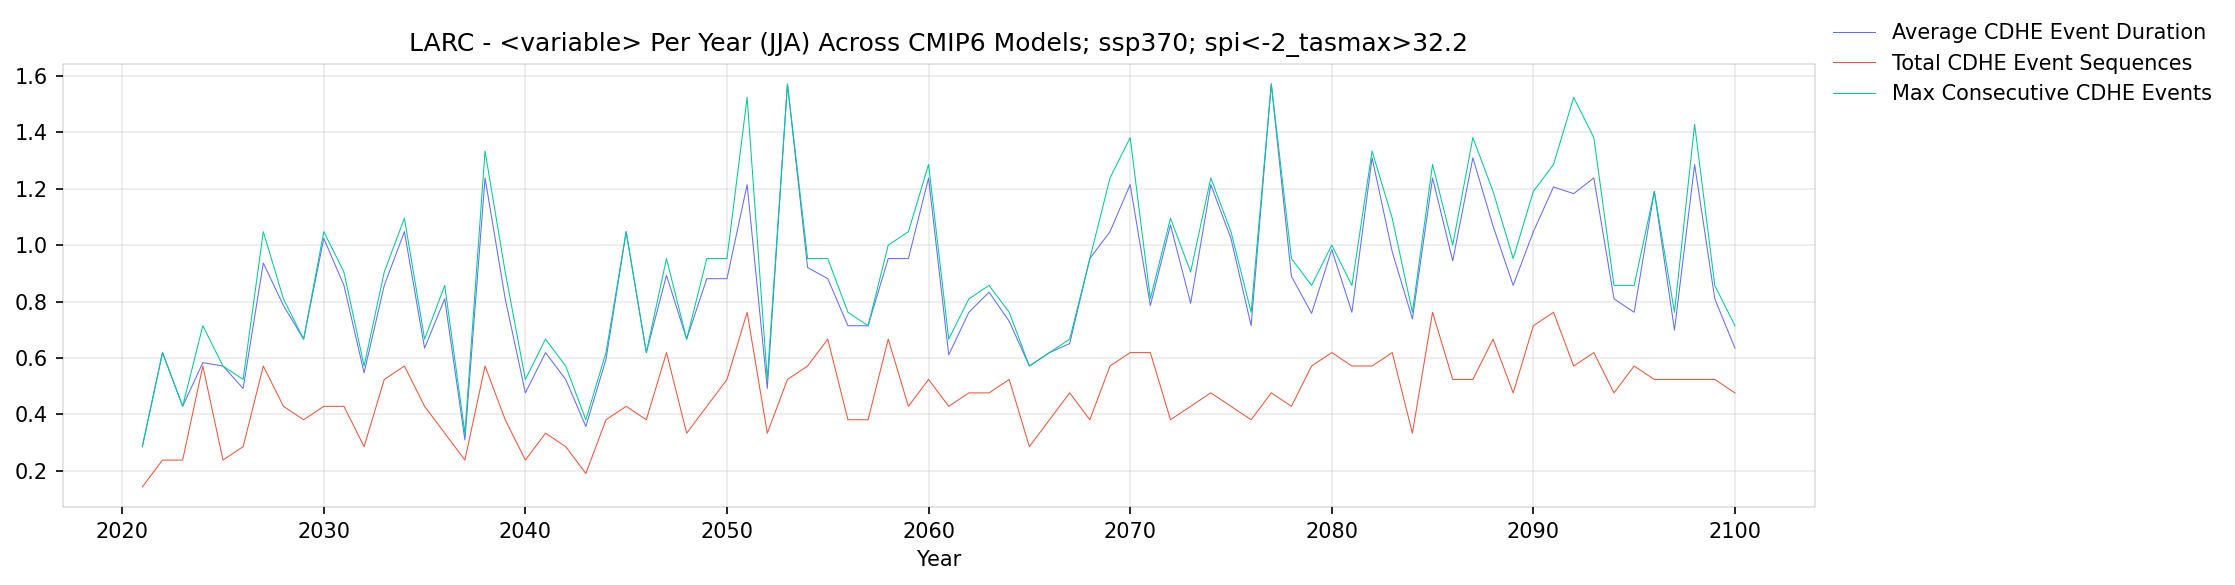

In [11]:
var = ['_duration_mean$', '_sequence_total$', '_event_max$']            
Plot(center, months, '', '').variable_comp(results, var, metrics)